<a href="https://www.kaggle.com/code/mahbuburrahman2020/se-europe-data-challenge-data-analysis?scriptVersionId=162773523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Powering Tomorrow: A Global Odyssey of Sustainable Innovation - Top Countries Illuminating 2022 with Green Energy Brilliance**

Sustainable power generation is trending now-a-days. Governments of different countries in the world now investing in the sustainable power generation to save planet from climate change and other socio-economic issues. This data story tells about the green energy production in European counties in year 2022. The main character of this story is the green energy. I tell some insights about the green energy brilliance in Europe in year 2022.

In [1]:
import pandas as pd
import numpy as np
import os

I use dataset from Kaggle which is created and fine-tuned by me from the raw data of Entsoe Transparency Platform. The dataset contains monthly energy generation quantity of year 2022 from different type of green energy production sources in different countries in Europe.

In [2]:
file_name = "/kaggle/input/europe-green-electricity-generation-consumption/gen_2022_monthly.csv"

In Europe, the countries generate green energy mainly from Wind, Water, Solar. There are also other form of green energy generations. These main sources of green energy generations are splitted into some specific energy generations to get better understanding about the energy productions.

In [3]:
df_gen_2022_monthly = pd.read_csv(file_name)
df_gen_2022_monthly

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13777505,MAW
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12540609,MAW
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13949928,MAW
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13169383,MAW
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13334915,MAW
...,...,...,...,...,...,...,...,...,...,...
739,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,479952,MAW
740,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,27040,MAW
741,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,177457,MAW
742,2022-11-01 00:00:00+00:00,2022-11-30 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,UK,1,577406,MAW


I create a data profiling report to get an overview of the dataset. I use ydata profiling python package to generate the report.

In [4]:
file_name = "gen_2022_data_profile.html"

In [5]:
from ydata_profiling import ProfileReport
df_gen_data_profile_path = os.path.join('/kaggle/working/', file_name)
profile = ProfileReport(df_gen_2022_monthly, title="Energy Generation : Year 2022")
profile.to_file(df_gen_data_profile_path)

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

I see that there are some missing data in the AreaID variable. The AreaID contains the area code of the generation of a country. From the dataset, I remove the rows which contain missing AreaID. 

In [6]:
#df_gen_2022_monthly = df_gen_2022_monthly.dropna()
#df_gen_2022_monthly = df_gen_2022_monthly.set_index(pd.Index(np.arange(0, df_gen_2022_monthly.shape[0])))
#df_gen_2022_monthly

I grouped the data according to country, generation type, production type. I aggregate the quantity using "sum" function and get the total energy generation quantity in MAW. MAW is the unit name of the energy generation.

In [7]:
df_gen_2022_country_gen_types = df_gen_2022_monthly.groupby(by=["Country", "GenType", "PsrTypeName"])[["quantity"]].sum()
df_gen_2022_country_gen_types

quantity
Country GenType PsrTypeName                               
DE      Other   Biomass                          157870113
                Geothermal                          785268
                Other renewable                    4115606
        Solar   Solar                            221763900
        Water   Hydro Pumped Storage              99807673
                Hydro Run-of-river and poundage   45027903
                Hydro Water Reservoir              4497667
        Wind    Wind Offshore                     98981373
                Wind Onshore                     402241380
DK      Other   Biomass                            4105891
        Solar   Solar                              2110925
        Wind    Wind Offshore                      8449686
                Wind Onshore                      10521997
HU      Other   Biomass                            4456243
                Geothermal                            2947
                Other renewable                     430235
        Solar   Solar                             12322431
        Water   Hydro Run-of-river and poundage     318568
                Hydro Water Reservoir               299303
        Wind    Wind Onshore                       2338736
IT      Other   Biomass                            5552330
                Geothermal                         5444343
        Solar   Solar                             22472708
        Water   Hydro Pumped Storage               5502683
                Hydro Run-of-river and poundage   23005989
                Hydro Water Reservoir              3353870
        Wind    Wind Onshore                      20102492
NL      Other   Biomass                             640171
        Solar   Solar                              2045853
        Water   Hydro Run-of-river and poundage          0
        Wind    Wind Offshore                     32120495
                Wind Onshore                      27208358
PO      Other   Biomass                            1613072
        Solar   Solar                              9290407
        Water   Hydro Pumped Storage               1266800
                Hydro Run-of-river and poundage    1455616
                Hydro Water Reservoir                89670
        Wind    Wind Onshore                      18772024
SE      Solar   Solar                               824947
        Water   Hydro Water Reservoir             69673383
                Marine                                   0
        Wind    Wind Onshore                      32753344
SP      Other   Biomass                           11053101
                Geothermal                               0
                Other renewable                    2300065
        Solar   Solar                             92651977
        Water   Hydro Pumped Storage              20161892
                Hydro Run-of-river and poundage   17569311
                Hydro Water Reservoir             40432437
                Marine                                   0
        Wind    Wind Offshore                            0
                Wind Onshore                     161740015
UK      Wind    Wind Onshore                       5041076

In [8]:
df_gen_2022_country_gen_types.shape

(53, 1)

In [9]:
df_gen_2022_country_gen_types = df_gen_2022_country_gen_types.reset_index()
df_gen_2022_country_gen_types

,Country,GenType,PsrTypeName,quantity
0,DE,Other,Biomass,157870113
1,DE,Other,Geothermal,785268
2,DE,Other,Other renewable,4115606
3,DE,Solar,Solar,221763900
4,DE,Water,Hydro Pumped Storage,99807673
5,DE,Water,Hydro Run-of-river and poundage,45027903
6,DE,Water,Hydro Water Reservoir,4497667
7,DE,Wind,Wind Offshore,98981373
8,DE,Wind,Wind Onshore,402241380
9,DK,Other,Biomass,4105891


In [10]:
df_gen_2022_country_gen_types["quantity"]

0     157870113
1        785268
2       4115606
3     221763900
4      99807673
5      45027903
6       4497667
7      98981373
8     402241380
9       4105891
10      2110925
11      8449686
12     10521997
13      4456243
14         2947
15       430235
16     12322431
17       318568
18       299303
19      2338736
20      5552330
21      5444343
22     22472708
23      5502683
24     23005989
25      3353870
26     20102492
27       640171
28      2045853
29            0
30     32120495
31     27208358
32      1613072
33      9290407
34      1266800
35      1455616
36        89670
37     18772024
38       824947
39     69673383
40            0
41     32753344
42     11053101
43            0
44      2300065
45     92651977
46     20161892
47     17569311
48     40432437
49            0
50            0
51    161740015
52      5041076
Name: quantity, dtype: int64

In [11]:
df_gen_2022_country_gen_types["quantity"].to_numpy().reshape((df_gen_2022_country_gen_types.shape[0], 1))

array([[157870113],
       [   785268],
       [  4115606],
       [221763900],
       [ 99807673],
       [ 45027903],
       [  4497667],
       [ 98981373],
       [402241380],
       [  4105891],
       [  2110925],
       [  8449686],
       [ 10521997],
       [  4456243],
       [     2947],
       [   430235],
       [ 12322431],
       [   318568],
       [   299303],
       [  2338736],
       [  5552330],
       [  5444343],
       [ 22472708],
       [  5502683],
       [ 23005989],
       [  3353870],
       [ 20102492],
       [   640171],
       [  2045853],
       [        0],
       [ 32120495],
       [ 27208358],
       [  1613072],
       [  9290407],
       [  1266800],
       [  1455616],
       [    89670],
       [ 18772024],
       [   824947],
       [ 69673383],
       [        0],
       [ 32753344],
       [ 11053101],
       [        0],
       [  2300065],
       [ 92651977],
       [ 20161892],
       [ 17569311],
       [ 40432437],
       [        0],


The aggregated quantities are large numbers so it is not easy to plot those numbers in any visual diagrams. So I normalize those numbers using MinMaxScaler package from sci-kit learn library.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_gen_2022_country_gen_types["normalized_quantity"] = pd.Series(data=scaler.fit_transform(df_gen_2022_country_gen_types["quantity"].to_numpy().reshape((df_gen_2022_country_gen_types.shape[0], 1))).reshape((df_gen_2022_country_gen_types.shape[0],)))

In [13]:
df_gen_2022_country_gen_types

,Country,GenType,PsrTypeName,quantity,normalized_quantity
0,DE,Other,Biomass,157870113,0.392476
1,DE,Other,Geothermal,785268,0.001952
2,DE,Other,Other renewable,4115606,0.010232
3,DE,Solar,Solar,221763900,0.551320
4,DE,Water,Hydro Pumped Storage,99807673,0.248129
5,DE,Water,Hydro Run-of-river and poundage,45027903,0.111942
6,DE,Water,Hydro Water Reservoir,4497667,0.011182
7,DE,Wind,Wind Offshore,98981373,0.246075
8,DE,Wind,Wind Onshore,402241380,1.000000
9,DK,Other,Biomass,4105891,0.010208


In [14]:
df_gen_2022_eu_gen_types = df_gen_2022_country_gen_types.groupby(by=["GenType"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_eu_gen_types

,quantity,normalized_quantity
GenType,,
Other,198369385,0.493160
Solar,363483148,0.903644
Water,332462765,0.826526
Wind,820270976,2.039251


In [15]:
df_gen_2022_eu_gen_types = df_gen_2022_eu_gen_types.reset_index()
df_gen_2022_eu_gen_types

,GenType,quantity,normalized_quantity
0,Other,198369385,0.493160
1,Solar,363483148,0.903644
2,Water,332462765,0.826526
3,Wind,820270976,2.039251


In below, I visualize the total green energy generation from different sources in Europe using pie chart. 

Text(0.5, 1.0, 'Year 2022 : Green Energy Generation from different sources in EU')

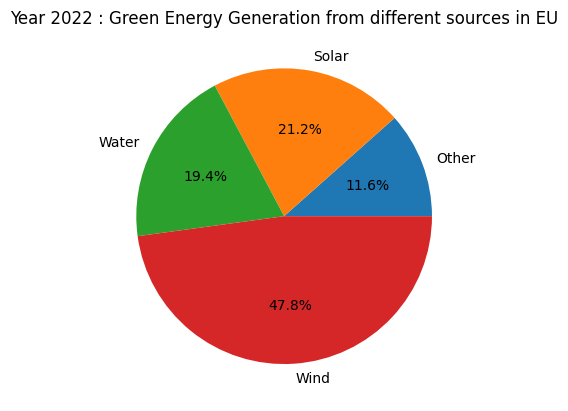

In [16]:
import matplotlib.pyplot as plt

labels = df_gen_2022_eu_gen_types["GenType"]
sizes = df_gen_2022_eu_gen_types["normalized_quantity"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Year 2022 : Green Energy Generation from different sources in EU')

In the pie chart which is visualized in above, the "Wind" is the main source of green energy generation in Europe. 47.8% of total green energy is come from different type of "Wind" sources. The second main source of European green energy is the "Solar". The 21.2% of the total green energy is come from "Solar" power generation.

In [17]:
df_gen_2022_country = df_gen_2022_country_gen_types.groupby(by=["Country"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_country

,quantity,normalized_quantity
Country,,
DE,1035090883,2.573308
DK,25188499,0.062620
HU,20168463,0.050140
IT,85434415,0.212396
NL,62014877,0.154173
PO,32487589,0.080766
SE,103251674,0.256691
SP,345908798,0.859953
UK,5041076,0.012532


In [18]:
df_gen_2022_country = df_gen_2022_country.reset_index()
df_gen_2022_country

,Country,quantity,normalized_quantity
0,DE,1035090883,2.573308
1,DK,25188499,0.062620
2,HU,20168463,0.050140
3,IT,85434415,0.212396
4,NL,62014877,0.154173
5,PO,32487589,0.080766
6,SE,103251674,0.256691
7,SP,345908798,0.859953
8,UK,5041076,0.012532


In [19]:
df_gen_2022_country = df_gen_2022_country.sort_values("quantity", ascending=False)
df_gen_2022_country

,Country,quantity,normalized_quantity
0,DE,1035090883,2.573308
7,SP,345908798,0.859953
6,SE,103251674,0.256691
3,IT,85434415,0.212396
4,NL,62014877,0.154173
5,PO,32487589,0.080766
1,DK,25188499,0.062620
2,HU,20168463,0.050140
8,UK,5041076,0.012532


In the following bar plot, I ranked the European countries in green energy generation in year 2022 from the quantity variable. I use the normalized quantity to draw the bars and also use the orginal quantity to label each bar at top.

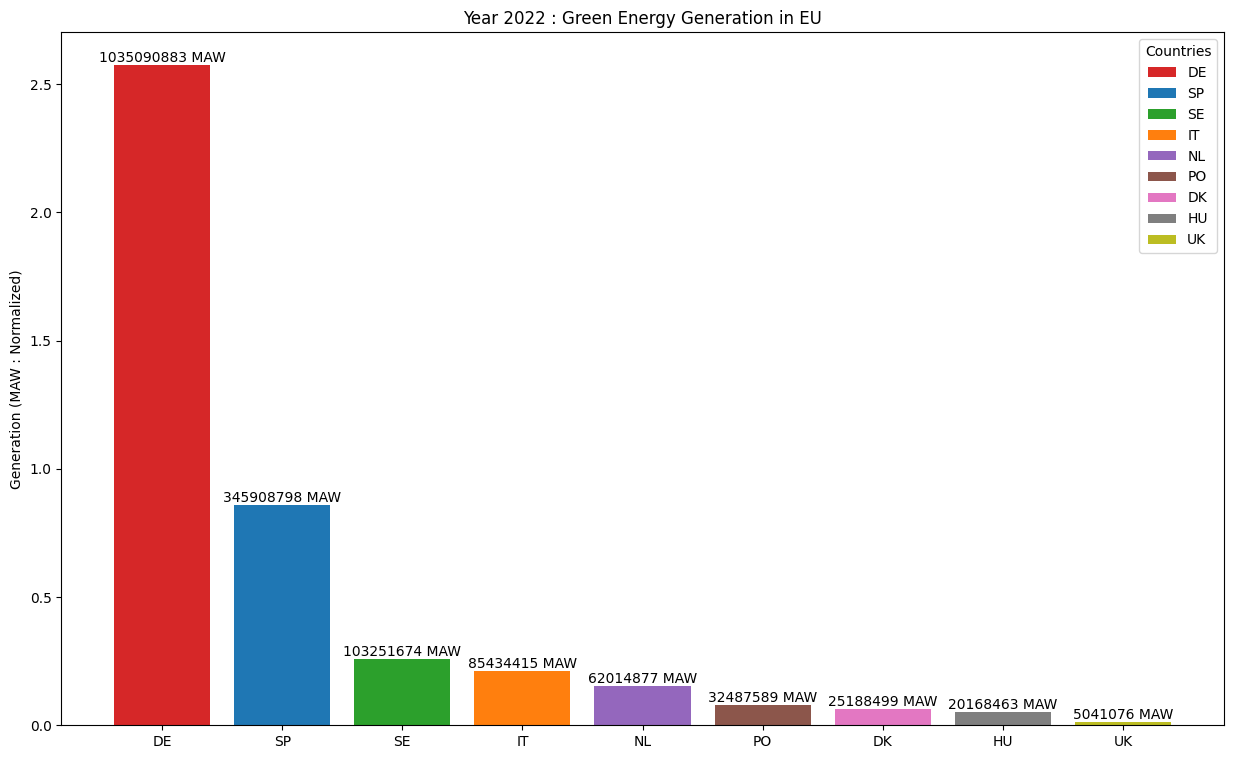

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,9))

countries = df_gen_2022_country["Country"]
ener_gen = df_gen_2022_country["normalized_quantity"]
bar_labels = countries
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

bar_container = ax.bar(countries, ener_gen, label=bar_labels, color=bar_colors)

ax.set_ylabel('Generation (MAW : Normalized)')
ax.set_title('Year 2022 : Green Energy Generation in EU')
ax.legend(title='Countries')
ax.bar_label(bar_container, labels=[f"{q} MAW" for q in df_gen_2022_country["quantity"]])

plt.show()

The bar plot shows that the Germany is ranked 1 country in green energy generation in Europe in year 2022. Germany produced total 1035090883 MAW green energy from different sources including Wind, Water and Solar etc. The second largest country who generated green energy in year 2022 is Spain. Spain generated total 345908798 MAW green energy from different sources. 

In [21]:
df_gen_2022_country_gen_types[df_gen_2022_country_gen_types["GenType"].isin(["Wind", "Solar"])]

,Country,GenType,PsrTypeName,quantity,normalized_quantity
3,DE,Solar,Solar,221763900,0.551320
7,DE,Wind,Wind Offshore,98981373,0.246075
8,DE,Wind,Wind Onshore,402241380,1.000000
10,DK,Solar,Solar,2110925,0.005248
11,DK,Wind,Wind Offshore,8449686,0.021007
12,DK,Wind,Wind Onshore,10521997,0.026158
16,HU,Solar,Solar,12322431,0.030634
19,HU,Wind,Wind Onshore,2338736,0.005814
22,IT,Solar,Solar,22472708,0.055869
26,IT,Wind,Wind Onshore,20102492,0.049976


In [22]:
df_gen_2022_country = df_gen_2022_country_gen_types[df_gen_2022_country_gen_types["GenType"].isin(["Wind", "Solar"])].groupby(by=["Country", "GenType"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_country

quantity  normalized_quantity
Country GenType                                
DE      Solar    221763900             0.551320
        Wind     501222753             1.246075
DK      Solar      2110925             0.005248
        Wind      18971683             0.047165
HU      Solar     12322431             0.030634
        Wind       2338736             0.005814
IT      Solar     22472708             0.055869
        Wind      20102492             0.049976
NL      Solar      2045853             0.005086
        Wind      59328853             0.147496
PO      Solar      9290407             0.023097
        Wind      18772024             0.046669
SE      Solar       824947             0.002051
        Wind      32753344             0.081427
SP      Solar     92651977             0.230339
        Wind     161740015             0.402097
UK      Wind       5041076             0.012532

In [23]:
df_gen_2022_country = df_gen_2022_country.reset_index()
df_gen_2022_country

,Country,GenType,quantity,normalized_quantity
0,DE,Solar,221763900,0.551320
1,DE,Wind,501222753,1.246075
2,DK,Solar,2110925,0.005248
3,DK,Wind,18971683,0.047165
4,HU,Solar,12322431,0.030634
5,HU,Wind,2338736,0.005814
6,IT,Solar,22472708,0.055869
7,IT,Wind,20102492,0.049976
8,NL,Solar,2045853,0.005086
9,NL,Wind,59328853,0.147496


In [24]:
df_gen_2022_country = df_gen_2022_country.sort_values(["Country", "GenType"])
df_gen_2022_country

,Country,GenType,quantity,normalized_quantity
0,DE,Solar,221763900,0.551320
1,DE,Wind,501222753,1.246075
2,DK,Solar,2110925,0.005248
3,DK,Wind,18971683,0.047165
4,HU,Solar,12322431,0.030634
5,HU,Wind,2338736,0.005814
6,IT,Solar,22472708,0.055869
7,IT,Wind,20102492,0.049976
8,NL,Solar,2045853,0.005086
9,NL,Wind,59328853,0.147496


In [25]:
temp_1_df_gen_2022_country = df_gen_2022_country.loc[:15]
temp_2_df_gen_2022_country = df_gen_2022_country.loc[16:17]
temp_3_df_gen_2022_country = pd.DataFrame(data={
    "Country": ["UK"],
    "GenType": ["Solar"],
    "quantity": [0],
    "normalized_quantity": [0.0]
})
df_gen_2022_country = pd.concat([temp_1_df_gen_2022_country, temp_3_df_gen_2022_country, temp_2_df_gen_2022_country])
df_gen_2022_country

,Country,GenType,quantity,normalized_quantity
0,DE,Solar,221763900,0.551320
1,DE,Wind,501222753,1.246075
2,DK,Solar,2110925,0.005248
3,DK,Wind,18971683,0.047165
4,HU,Solar,12322431,0.030634
5,HU,Wind,2338736,0.005814
6,IT,Solar,22472708,0.055869
7,IT,Wind,20102492,0.049976
8,NL,Solar,2045853,0.005086
9,NL,Wind,59328853,0.147496


In [26]:
df_gen_2022_country[df_gen_2022_country["GenType"] == "Wind"]["normalized_quantity"].shape

(9,)

In [27]:
df_gen_2022_country[df_gen_2022_country["GenType"] == "Solar"]["normalized_quantity"].shape

(9,)

The bar chart shows the green energy generation from Wind and Solar for European countries in year 2022. The Y-axis represents the normalized generation quantity in MAW and the top of each bar represents the actual generation quantity in MAW. 

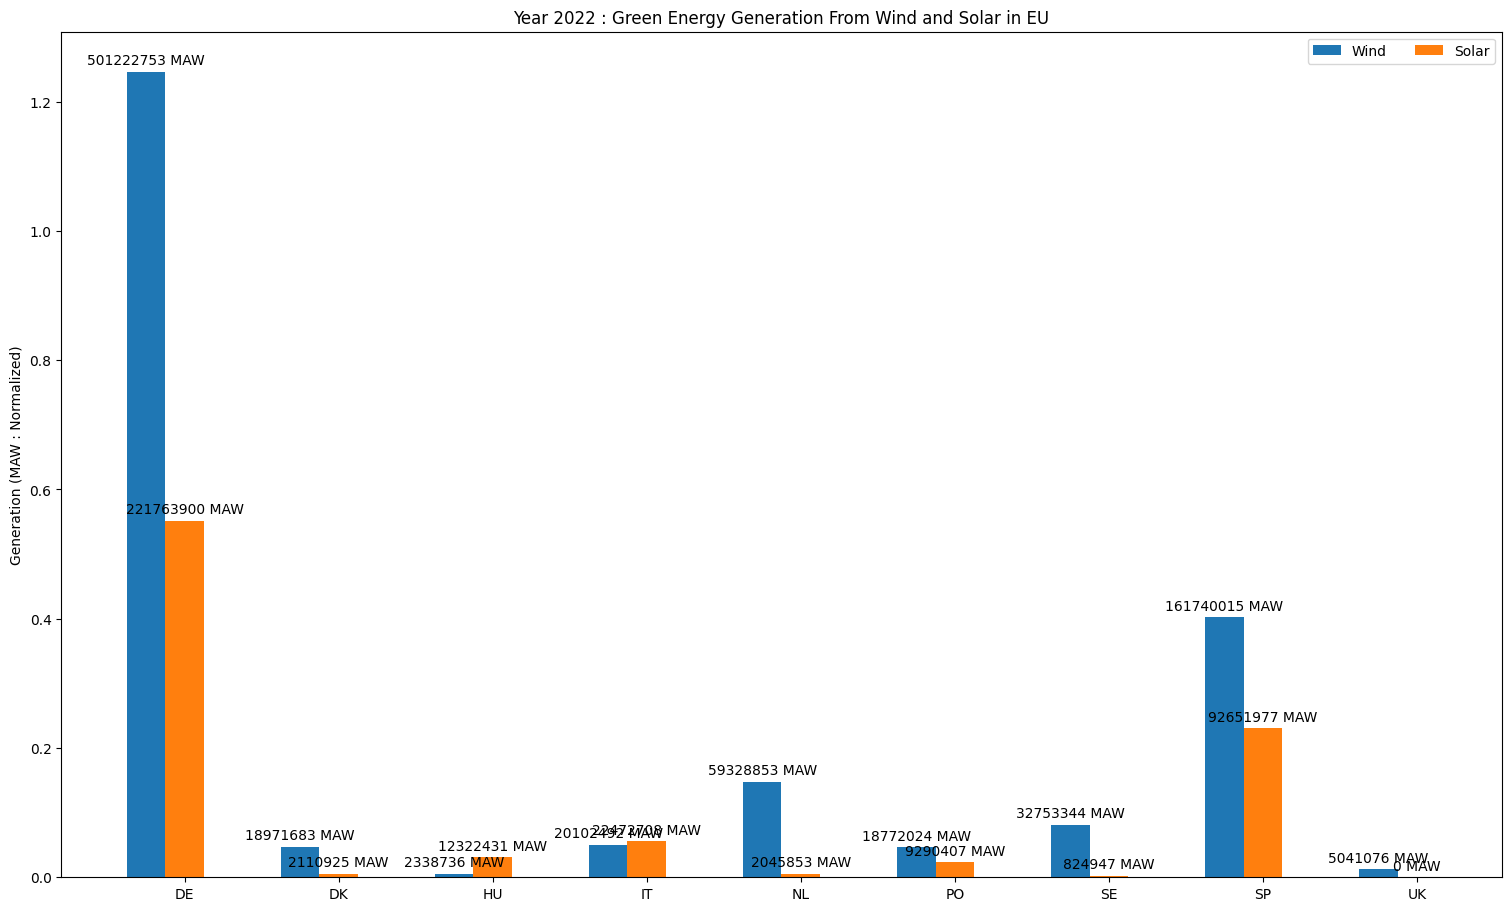

In [28]:
import matplotlib.pyplot as plt

countries = df_gen_2022_country["Country"].drop_duplicates()
energy_generations = {
    'Wind': df_gen_2022_country[df_gen_2022_country["GenType"] == "Wind"]["normalized_quantity"],
    'Solar': df_gen_2022_country[df_gen_2022_country["GenType"] == "Solar"]["normalized_quantity"],
}

x = np.arange(len(countries))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(15,9))

for attribute, measurement in energy_generations.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, labels=[f"{q} MAW" for q in df_gen_2022_country[df_gen_2022_country["GenType"] == attribute]["quantity"]])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Generation (MAW : Normalized)')
ax.set_title('Year 2022 : Green Energy Generation From Wind and Solar in EU')
ax.set_xticks(x + width, countries)
ax.legend(loc='upper right', ncols=2)

plt.show()

The bar chart represents the Germany as the top green energy generation in Wind and Solar sector. Second top green energy generation country in europe is Spain in Wind and Solar sector. Germany generated 501222753 MAW green energy from Wind sector. On the other side, Spain generated 161740015 MAW green energy from Wind sector. From these two numbers, it is seen that Germany's main source of green energy is Wind. The Solar is the next top source of green energy generation in Germnay. In year 2022, Germany generated 221763900 MAW green energy from Solar sector. In later sections, I do deeper analysis on Wind and Solar sectors.  

In [29]:
df_gen_2022_de = df_gen_2022_country_gen_types[df_gen_2022_country_gen_types["Country"] == "DE"].groupby(by=["GenType"])[["quantity", "normalized_quantity"]].sum()
df_gen_2022_de

,quantity,normalized_quantity
GenType,,
Other,162770987,0.404660
Solar,221763900,0.551320
Water,149333243,0.371253
Wind,501222753,1.246075


In [30]:
df_gen_2022_de = df_gen_2022_de.reset_index()
df_gen_2022_de

,GenType,quantity,normalized_quantity
0,Other,162770987,0.404660
1,Solar,221763900,0.551320
2,Water,149333243,0.371253
3,Wind,501222753,1.246075


Another visualization on German green energy generation shows the overall percentage in different sources for year 2022. There are four sources of green energy generation. These are Solar, Wind, Water and Other. For the visualization, I use pie chart with different colors for generation sources.

Text(0.5, 1.0, 'Year 2022 : Green Energy Generation from different sources in Germany as Top Producer')

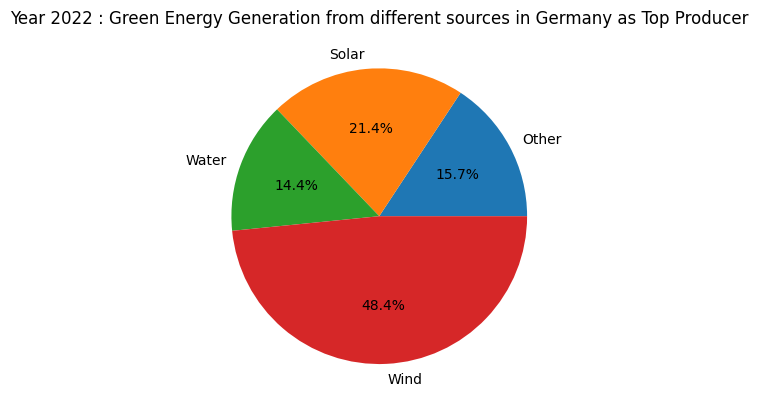

In [31]:
import matplotlib.pyplot as plt

labels = df_gen_2022_de["GenType"]
sizes = df_gen_2022_de["normalized_quantity"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Year 2022 : Green Energy Generation from different sources in Germany as Top Producer')

I see that Wind sector is the major energy generation source for green power in Germany. 48.4% percentage of total energy generation comes from Wind. The second highest source of green energy generation is Solar. The green energy which comes from Solar is 21.4%. The other two sources totaly produce 30.1% green energy from Water and Other sources.  

In [32]:
df_gen_2022_de = df_gen_2022_country_gen_types[df_gen_2022_country_gen_types["Country"] == "DE"]
df_gen_2022_de

,Country,GenType,PsrTypeName,quantity,normalized_quantity
0,DE,Other,Biomass,157870113,0.392476
1,DE,Other,Geothermal,785268,0.001952
2,DE,Other,Other renewable,4115606,0.010232
3,DE,Solar,Solar,221763900,0.551320
4,DE,Water,Hydro Pumped Storage,99807673,0.248129
5,DE,Water,Hydro Run-of-river and poundage,45027903,0.111942
6,DE,Water,Hydro Water Reservoir,4497667,0.011182
7,DE,Wind,Wind Offshore,98981373,0.246075
8,DE,Wind,Wind Onshore,402241380,1.000000


In [33]:
df_gen_2022_de = df_gen_2022_de[df_gen_2022_de["GenType"].isin(["Wind", "Solar", "Other"])]
df_gen_2022_de

,Country,GenType,PsrTypeName,quantity,normalized_quantity
0,DE,Other,Biomass,157870113,0.392476
1,DE,Other,Geothermal,785268,0.001952
2,DE,Other,Other renewable,4115606,0.010232
3,DE,Solar,Solar,221763900,0.551320
7,DE,Wind,Wind Offshore,98981373,0.246075
8,DE,Wind,Wind Onshore,402241380,1.000000


The Wind and Solar energy generatons bar chart of different european countries of year 2022 and the total green energy generations of Germany in year 2022 show that Germany's most green energies are generated from Wind and Solar. I show another visualization in below to analyse more deep into different sub sources of Wind and Solar. 

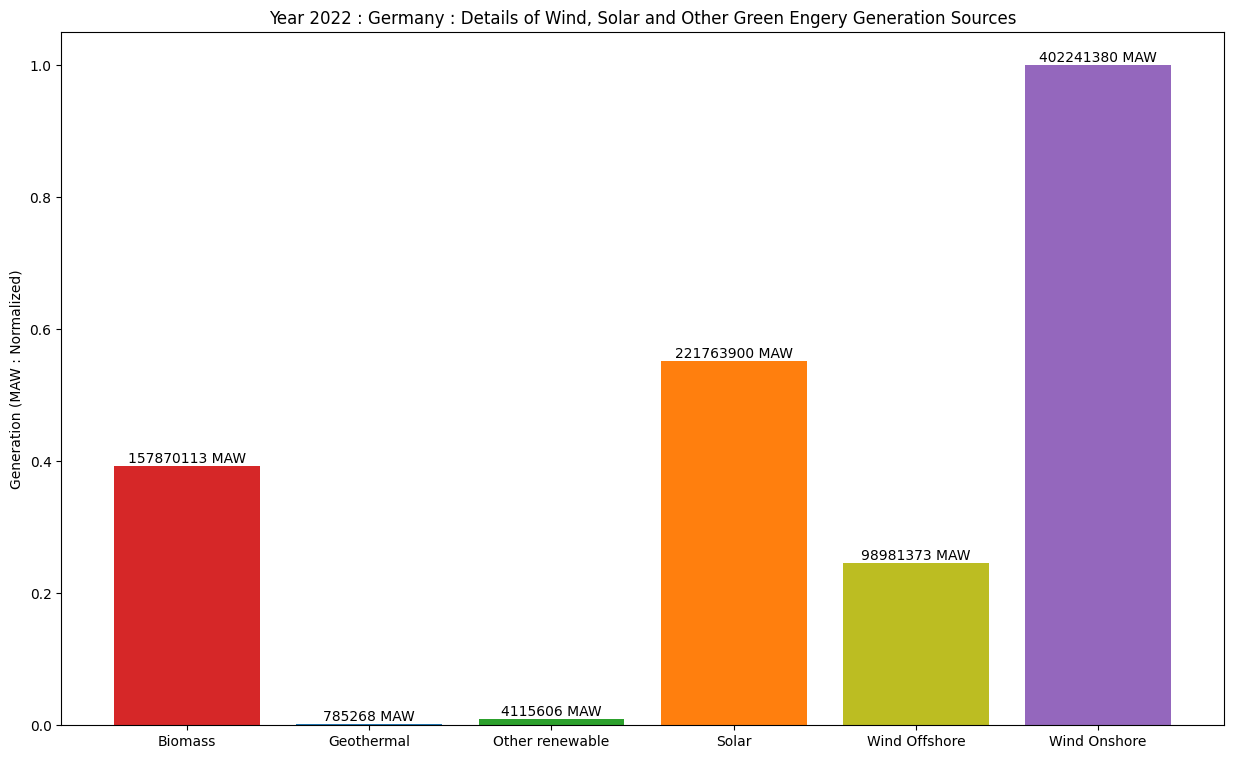

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,9))

psrtypes = df_gen_2022_de["PsrTypeName"]
norm_quantities = df_gen_2022_de["normalized_quantity"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive', 'tab:purple']

bar_container = ax.bar(psrtypes, norm_quantities, color=bar_colors)

ax.set_ylabel('Generation (MAW : Normalized)')
ax.set_title('Year 2022 : Germany : Details of Wind, Solar and Other Green Engery Generation Sources')
ax.bar_label(bar_container, labels=[f"{q} MAW" for q in df_gen_2022_de["quantity"]])

plt.show()

The above bar chart represents Germany's green energy generation from different sub sources of Wind and Solar in year 2022. In Germany, the Wind Onshore is the main source of Wind power generation. In year 2022, Germany produced 402241380 MAW green energy from Wind Onshore in 2022. Also in year 2022, 98981373 MAW green energy from Wind Offshore.  After Wind Onshore, the second largest source of green energy generation is the Solar. In year 2022, Solar was used to produce 221763900 MAW green energy. In year 2022, Germany generated 157870113 MAW green energy from Biomass.

In [35]:
df_gen_2022_monthly_de = df_gen_2022_monthly[df_gen_2022_monthly["Country"] == "DE"]
df_gen_2022_monthly_de

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13777505,MAW
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12540609,MAW
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13949928,MAW
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13169383,MAW
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13334915,MAW
...,...,...,...,...,...,...,...,...,...,...
139,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,DE,2,0,MAW
140,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,DE,2,0,MAW
141,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,DE,2,0,MAW
142,2022-11-01 00:00:00+00:00,2022-11-30 00:00:00+00:00,B19,Wind Onshore,Wind,NaN,DE,2,0,MAW


In [36]:
df_gen_2022_monthly_de_wind_onshore = df_gen_2022_monthly_de[df_gen_2022_monthly_de["PsrTypeName"] == "Wind Onshore"]
df_gen_2022_monthly_de_wind_onshore

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
120,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,51623155,MAW
121,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,70659828,MAW
122,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,27078691,MAW
123,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,37739395,MAW
124,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,25627594,MAW
125,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,17629564,MAW
126,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,21868059,MAW
127,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,14019502,MAW
128,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,24713913,MAW
129,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2,34046904,MAW


In [37]:
df_gen_2022_monthly_de_wind_onshore = df_gen_2022_monthly_de_wind_onshore.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_monthly_de_wind_onshore = df_gen_2022_monthly_de_wind_onshore.reset_index()
df_gen_2022_monthly_de_wind_onshore

,StartTime,EndTime,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,51623155
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,70659828
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,27078691
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,37739395
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,25627594
5,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,17629564
6,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,21868059
7,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,14019502
8,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,24713913
9,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,34046904


In [38]:
df_gen_2022_monthly_de_solar = df_gen_2022_monthly_de[df_gen_2022_monthly_de["PsrTypeName"] == "Solar"]
df_gen_2022_monthly_de_solar

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
84,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,3900670,MAW
85,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,8933062,MAW
86,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,21987401,MAW
87,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,22362084,MAW
88,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,29441610,MAW
89,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,31490045,MAW
90,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,31615484,MAW
91,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,29147495,MAW
92,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,19203475,MAW
93,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B16,Solar,Solar,10Y1001A1001A83F,DE,2,14240213,MAW


In [39]:
df_gen_2022_monthly_de_solar = df_gen_2022_monthly_de_solar.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_monthly_de_solar = df_gen_2022_monthly_de_solar.reset_index()
df_gen_2022_monthly_de_solar

,StartTime,EndTime,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,3900670
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,8933062
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,21987401
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,22362084
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,29441610
5,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,31490045
6,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,31615484
7,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,29147495
8,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,19203475
9,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,14240213


In [40]:
df_gen_2022_monthly_de_biomass = df_gen_2022_monthly_de[df_gen_2022_monthly_de["PsrTypeName"] == "Biomass"]
df_gen_2022_monthly_de_biomass

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13777505,MAW
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12540609,MAW
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13949928,MAW
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13169383,MAW
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13334915,MAW
5,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12475870,MAW
6,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12837803,MAW
7,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12768892,MAW
8,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,12724785,MAW
9,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B01,Biomass,Other,10Y1001A1001A83F,DE,2,13124443,MAW


In [41]:
df_gen_2022_monthly_de_biomass = df_gen_2022_monthly_de_biomass.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_monthly_de_biomass = df_gen_2022_monthly_de_biomass.reset_index()
df_gen_2022_monthly_de_biomass

,StartTime,EndTime,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,13777505
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,12540609
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,13949928
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,13169383
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,13334915
5,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,12475870
6,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,12837803
7,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,12768892
8,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,12724785
9,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,13124443


In [42]:
df_gen_2022_monthly_de_wind_offshore = df_gen_2022_monthly_de[df_gen_2022_monthly_de["PsrTypeName"] == "Wind Offshore"]
df_gen_2022_monthly_de_wind_offshore

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
108,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,12532434,MAW
109,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,11940276,MAW
110,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,5628281,MAW
111,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,7630247,MAW
112,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,5928670,MAW
113,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,4667853,MAW
114,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,7110554,MAW
115,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,4059002,MAW
116,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,7667753,MAW
117,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,B18,Wind Offshore,Wind,10Y1001A1001A83F,DE,2,9847866,MAW


In [43]:
df_gen_2022_monthly_de_wind_offshore = df_gen_2022_monthly_de_wind_offshore.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_monthly_de_wind_offshore = df_gen_2022_monthly_de_wind_offshore.reset_index()
df_gen_2022_monthly_de_wind_offshore

,StartTime,EndTime,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,12532434
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,11940276
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,5628281
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,7630247
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,5928670
5,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,4667853
6,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,7110554
7,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,4059002
8,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,7667753
9,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,9847866


I see in the above bar chart that there is some meaning full insights in the Wind Onshore, Wind Offshore, Solar and Biomass because most of green power was generated from these sources specially from Wind Onshore and Solar. So, I plot monthly green energy generation quantity of Wind Onshore, Wind Offshore, Solar and Biomass of year 2022 to see the monthly power generation trends.  

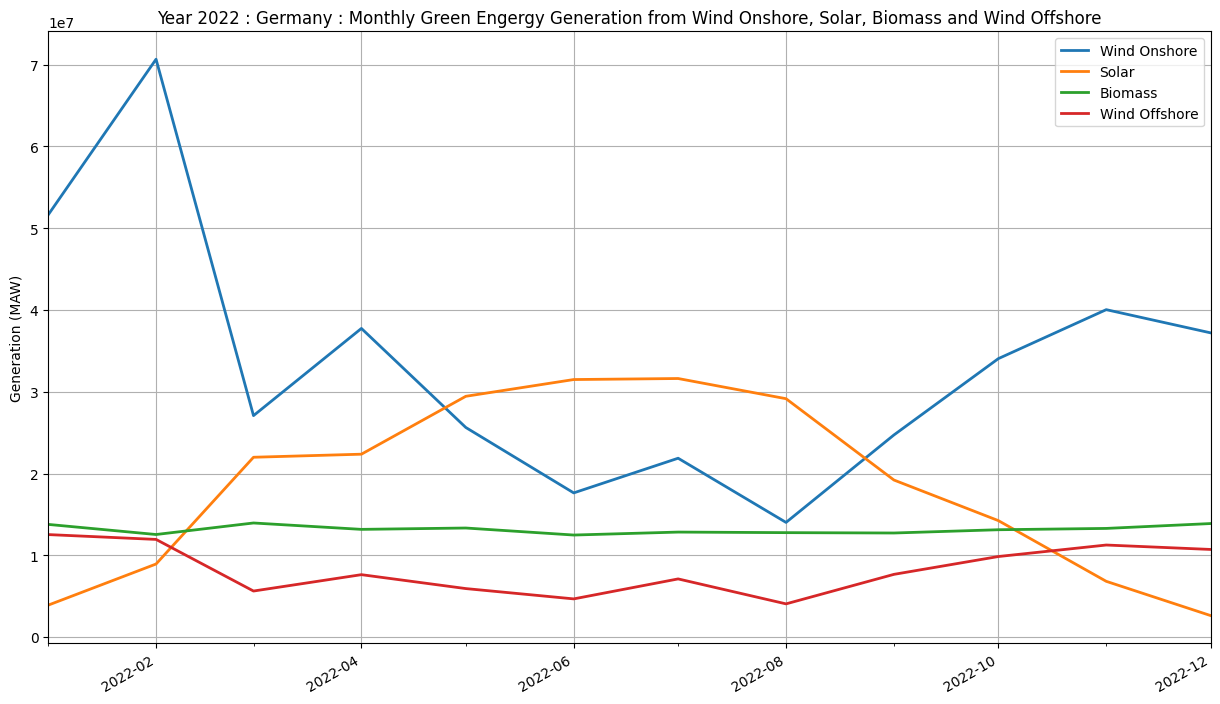

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(pd.to_datetime(df_gen_2022_monthly_de_wind_onshore["StartTime"]).dt.date, df_gen_2022_monthly_de_wind_onshore["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_monthly_de_solar["StartTime"]).dt.date, df_gen_2022_monthly_de_solar["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_monthly_de_biomass["StartTime"]).dt.date, df_gen_2022_monthly_de_biomass["quantity"], lw=2, label='Biomass')
ax.plot(pd.to_datetime(df_gen_2022_monthly_de_wind_offshore["StartTime"]).dt.date, df_gen_2022_monthly_de_wind_offshore["quantity"], lw=2, label='Wind Offshore')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Monthly Green Engergy Generation from Wind Onshore, Solar, Biomass and Wind Offshore')
ax.set_xlim(pd.to_datetime(df_gen_2022_monthly_de_wind_onshore.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_monthly_de_wind_onshore.loc[df_gen_2022_monthly_de_wind_onshore.shape[0] - 1, "StartTime"]))

major_monthly_locator = mdates.MonthLocator(interval=2)
minor_monthly_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(major_monthly_locator)
ax.xaxis.set_minor_locator(minor_monthly_locator)

fig.autofmt_xdate()

The above lines of green energy generation trend display the wave of green energy generation in different months of year 2022. I see that, Wind Onshore and Solar monthly generation trends are intersected two times, one is after the second week of April 2022 and another one is after the second week of August 2022. There is a "W" shape pattern in the energy genration trend of Wind Onshore which starts from April 2022 and ends in October 2022. The 



The monthly energy generation trend of Biomass is similar to straight line because there is few upward and downward in energy generation from month January to March and after that there is no significant changes in the energy generation. The trend line of Wind Offshore changed on every month slightly in upward and downward directions. After August 2022, the energy generation trend went upward and intersects the energy generation trend of Solar. 

* Wind Onshore
* Solar

In [45]:
df_gen_2022_monthly_de_wind_onshore_solar = df_gen_2022_monthly_de[df_gen_2022_monthly_de["PsrTypeName"].isin(["Wind Onshore", "Solar"])]
df_gen_2022_monthly_de_wind_onshore_solar = df_gen_2022_monthly_de_wind_onshore_solar.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_monthly_de_wind_onshore_solar = df_gen_2022_monthly_de_wind_onshore_solar.reset_index()
df_gen_2022_monthly_de_wind_onshore_solar

,StartTime,EndTime,quantity
0,2022-01-01 00:00:00+00:00,2022-01-31 00:00:00+00:00,55523825
1,2022-02-01 00:00:00+00:00,2022-02-28 00:00:00+00:00,79592890
2,2022-03-01 00:00:00+00:00,2022-03-31 00:00:00+00:00,49066092
3,2022-04-01 00:00:00+00:00,2022-04-30 00:00:00+00:00,60101479
4,2022-05-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,55069204
5,2022-06-01 00:00:00+00:00,2022-06-30 00:00:00+00:00,49119609
6,2022-07-01 00:00:00+00:00,2022-07-31 00:00:00+00:00,53483543
7,2022-08-01 00:00:00+00:00,2022-08-31 00:00:00+00:00,43166997
8,2022-09-01 00:00:00+00:00,2022-09-30 00:00:00+00:00,43917388
9,2022-10-01 00:00:00+00:00,2022-10-31 00:00:00+00:00,48287117


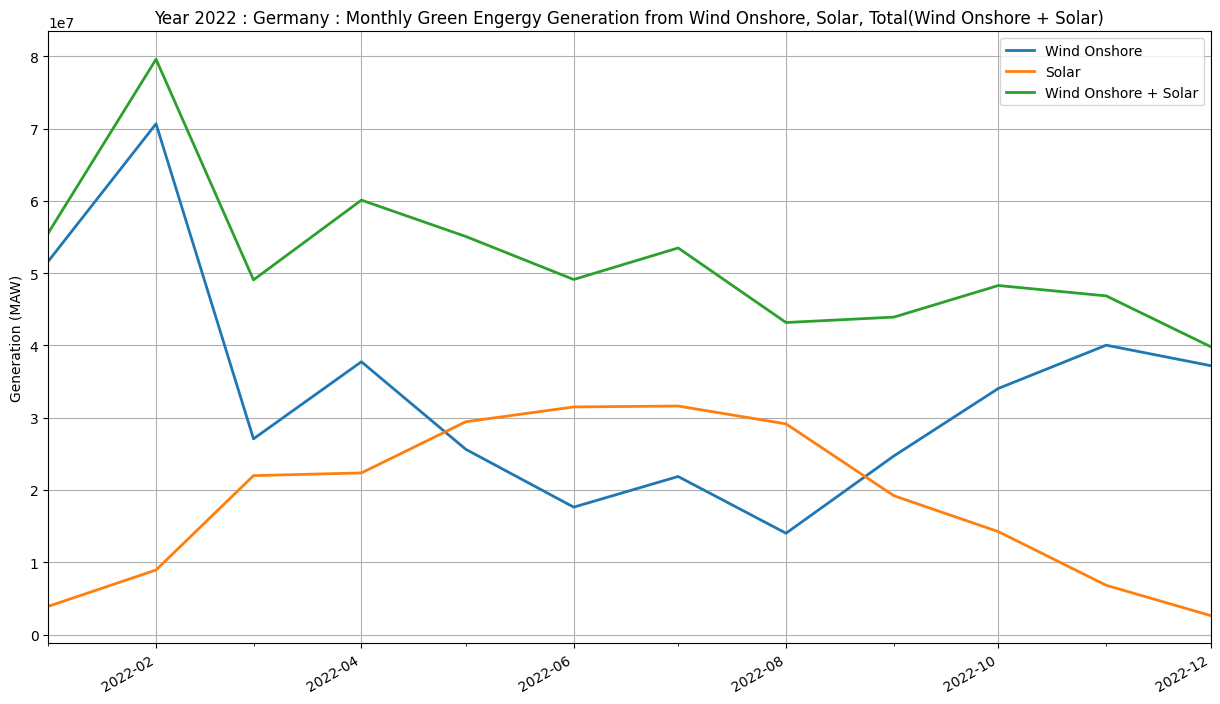

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(pd.to_datetime(df_gen_2022_monthly_de_wind_onshore["StartTime"]).dt.date, df_gen_2022_monthly_de_wind_onshore["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_monthly_de_solar["StartTime"]).dt.date, df_gen_2022_monthly_de_solar["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_monthly_de_wind_onshore_solar["StartTime"]).dt.date, df_gen_2022_monthly_de_wind_onshore_solar["quantity"], lw=2, label='Wind Onshore + Solar')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Monthly Green Engergy Generation from Wind Onshore, Solar, Total(Wind Onshore + Solar)')
ax.set_xlim(pd.to_datetime(df_gen_2022_monthly_de_wind_onshore_solar.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_monthly_de_wind_onshore_solar.loc[df_gen_2022_monthly_de_wind_onshore_solar.shape[0] - 1, "StartTime"]))

major_monthly_locator = mdates.MonthLocator(interval=2)
minor_monthly_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(major_monthly_locator)
ax.xaxis.set_minor_locator(minor_monthly_locator)

fig.autofmt_xdate()

In [47]:
file_name = "/kaggle/input/europe-green-electricity-generation-consumption/gen_2022_daily.csv"

In [48]:
df_gen_2022_daily = pd.read_csv(file_name)
df_gen_2022_daily

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
0,2022-01-01,2022-01-02,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,428653.0,MAW
1,2022-01-02,2022-01-03,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,427979.0,MAW
2,2022-01-03,2022-01-04,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,429196.0,MAW
3,2022-01-04,2022-01-05,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,432646.0,MAW
4,2022-01-05,2022-01-06,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,424438.0,MAW
...,...,...,...,...,...,...,...,...,...,...
21415,2022-12-27,2022-12-28,B19,Wind Onshore,Wind,NaN,UK,1.0,20744.0,MAW
21416,2022-12-28,2022-12-29,B19,Wind Onshore,Wind,NaN,UK,1.0,19062.0,MAW
21417,2022-12-29,2022-12-30,B19,Wind Onshore,Wind,NaN,UK,1.0,21658.0,MAW
21418,2022-12-30,2022-12-31,B19,Wind Onshore,Wind,NaN,UK,1.0,20614.0,MAW


In [49]:
#df_gen_2022_daily = df_gen_2022_daily.dropna()
#df_gen_2022_daily = df_gen_2022_daily.set_index(pd.Index(np.arange(0, df_gen_2022_daily.shape[0])))
#df_gen_2022_daily

In [50]:
df_gen_2022_daily_de = df_gen_2022_daily[df_gen_2022_daily["Country"] == "DE"]
df_gen_2022_daily_de

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
0,2022-01-01,2022-01-02,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,428653.0,MAW
1,2022-01-02,2022-01-03,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,427979.0,MAW
2,2022-01-03,2022-01-04,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,429196.0,MAW
3,2022-01-04,2022-01-05,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,432646.0,MAW
4,2022-01-05,2022-01-06,B01,Biomass,Other,10Y1001A1001A83F,DE,2.0,424438.0,MAW
...,...,...,...,...,...,...,...,...,...,...
4375,2022-12-27,2022-12-28,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4376,2022-12-28,2022-12-29,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4377,2022-12-29,2022-12-30,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4378,2022-12-30,2022-12-31,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW


In [51]:
df_gen_2022_daily_de_wos_solar = df_gen_2022_daily_de[df_gen_2022_daily_de["PsrTypeName"].isin(["Wind Onshore", "Solar"])]
df_gen_2022_daily_de_wos_solar

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
2555,2022-01-01,2022-01-02,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,137742.0,MAW
2556,2022-01-02,2022-01-03,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,102548.0,MAW
2557,2022-01-03,2022-01-04,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,90556.0,MAW
2558,2022-01-04,2022-01-05,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,42083.0,MAW
2559,2022-01-05,2022-01-06,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,105594.0,MAW
...,...,...,...,...,...,...,...,...,...,...
4375,2022-12-27,2022-12-28,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4376,2022-12-28,2022-12-29,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4377,2022-12-29,2022-12-30,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4378,2022-12-30,2022-12-31,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW


In [52]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-04-15')
df_gen_2022_daily_de_wos_solar = df_gen_2022_daily_de_wos_solar[pd.to_datetime(df_gen_2022_daily_de_wos_solar["StartTime"]) >= start_date]
df_gen_2022_daily_de_wos_solar

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
2659,2022-04-15,2022-04-16,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,603041.0,MAW
2660,2022-04-16,2022-04-17,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,990575.0,MAW
2661,2022-04-17,2022-04-18,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1135804.0,MAW
2662,2022-04-18,2022-04-19,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1145358.0,MAW
2663,2022-04-19,2022-04-20,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1032103.0,MAW
...,...,...,...,...,...,...,...,...,...,...
4375,2022-12-27,2022-12-28,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4376,2022-12-28,2022-12-29,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4377,2022-12-29,2022-12-30,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4378,2022-12-30,2022-12-31,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW


In [53]:
end_date = datetime.fromisoformat('2022-08-15')
df_gen_2022_daily_de_wos_solar = df_gen_2022_daily_de_wos_solar[pd.to_datetime(df_gen_2022_daily_de_wos_solar["StartTime"]) <= end_date]
df_gen_2022_daily_de_wos_solar

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
2659,2022-04-15,2022-04-16,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,603041.0,MAW
2660,2022-04-16,2022-04-17,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,990575.0,MAW
2661,2022-04-17,2022-04-18,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1135804.0,MAW
2662,2022-04-18,2022-04-19,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1145358.0,MAW
2663,2022-04-19,2022-04-20,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1032103.0,MAW
...,...,...,...,...,...,...,...,...,...,...
4237,2022-08-11,2022-08-12,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4238,2022-08-12,2022-08-13,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4239,2022-08-13,2022-08-14,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4240,2022-08-14,2022-08-15,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW


In [54]:
df_gen_2022_daily_de_wind_onshore = df_gen_2022_daily_de_wos_solar[df_gen_2022_daily_de_wos_solar["PsrTypeName"] == "Wind Onshore"]
df_gen_2022_daily_de_wind_onshore

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
3754,2022-04-15,2022-04-16,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2.0,732982.0,MAW
3755,2022-04-16,2022-04-17,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2.0,862102.0,MAW
3756,2022-04-17,2022-04-18,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2.0,598450.0,MAW
3757,2022-04-18,2022-04-19,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2.0,373513.0,MAW
3758,2022-04-19,2022-04-20,B19,Wind Onshore,Wind,10Y1001A1001A83F,DE,2.0,807714.0,MAW
...,...,...,...,...,...,...,...,...,...,...
4237,2022-08-11,2022-08-12,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4238,2022-08-12,2022-08-13,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4239,2022-08-13,2022-08-14,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW
4240,2022-08-14,2022-08-15,B19,Wind Onshore,Wind,NaN,DE,2.0,0.0,MAW


In [55]:
df_gen_2022_daily_de_wind_onshore = df_gen_2022_daily_de_wind_onshore.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_daily_de_wind_onshore = df_gen_2022_daily_de_wind_onshore.reset_index()
df_gen_2022_daily_de_wind_onshore

,StartTime,EndTime,quantity
0,2022-04-15,2022-04-16,732982.0
1,2022-04-16,2022-04-17,862102.0
2,2022-04-17,2022-04-18,598450.0
3,2022-04-18,2022-04-19,373513.0
4,2022-04-19,2022-04-20,807714.0
...,...,...,...
118,2022-08-11,2022-08-12,523088.0
119,2022-08-12,2022-08-13,605860.0
120,2022-08-13,2022-08-14,469343.0
121,2022-08-14,2022-08-15,568882.0


In [56]:
df_gen_2022_daily_de_solar = df_gen_2022_daily_de_wos_solar[df_gen_2022_daily_de_wos_solar["PsrTypeName"] == "Solar"]
df_gen_2022_daily_de_solar

,StartTime,EndTime,PsrType,PsrTypeName,GenType,AreaID,Country,CountryID,quantity,UnitName
2659,2022-04-15,2022-04-16,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,603041.0,MAW
2660,2022-04-16,2022-04-17,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,990575.0,MAW
2661,2022-04-17,2022-04-18,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1135804.0,MAW
2662,2022-04-18,2022-04-19,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1145358.0,MAW
2663,2022-04-19,2022-04-20,B16,Solar,Solar,10Y1001A1001A83F,DE,2.0,1032103.0,MAW
...,...,...,...,...,...,...,...,...,...,...
3142,2022-08-11,2022-08-12,B16,Solar,Solar,NaN,DE,2.0,0.0,MAW
3143,2022-08-12,2022-08-13,B16,Solar,Solar,NaN,DE,2.0,0.0,MAW
3144,2022-08-13,2022-08-14,B16,Solar,Solar,NaN,DE,2.0,0.0,MAW
3145,2022-08-14,2022-08-15,B16,Solar,Solar,NaN,DE,2.0,0.0,MAW


In [57]:
df_gen_2022_daily_de_solar = df_gen_2022_daily_de_solar.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_daily_de_solar = df_gen_2022_daily_de_solar.reset_index()
df_gen_2022_daily_de_solar

,StartTime,EndTime,quantity
0,2022-04-15,2022-04-16,603041.0
1,2022-04-16,2022-04-17,990575.0
2,2022-04-17,2022-04-18,1135804.0
3,2022-04-18,2022-04-19,1145358.0
4,2022-04-19,2022-04-20,1032103.0
...,...,...,...
118,2022-08-11,2022-08-12,1230856.0
119,2022-08-12,2022-08-13,1164356.0
120,2022-08-13,2022-08-14,1009691.0
121,2022-08-14,2022-08-15,1066968.0


In [58]:
df_gen_2022_daily_de_wind_onshore_solar = df_gen_2022_daily_de_wos_solar.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_daily_de_wind_onshore_solar = df_gen_2022_daily_de_wind_onshore_solar.reset_index()
df_gen_2022_daily_de_wind_onshore_solar

,StartTime,EndTime,quantity
0,2022-04-15,2022-04-16,1336023.0
1,2022-04-16,2022-04-17,1852677.0
2,2022-04-17,2022-04-18,1734254.0
3,2022-04-18,2022-04-19,1518871.0
4,2022-04-19,2022-04-20,1839817.0
...,...,...,...
118,2022-08-11,2022-08-12,1753944.0
119,2022-08-12,2022-08-13,1770216.0
120,2022-08-13,2022-08-14,1479034.0
121,2022-08-14,2022-08-15,1635850.0


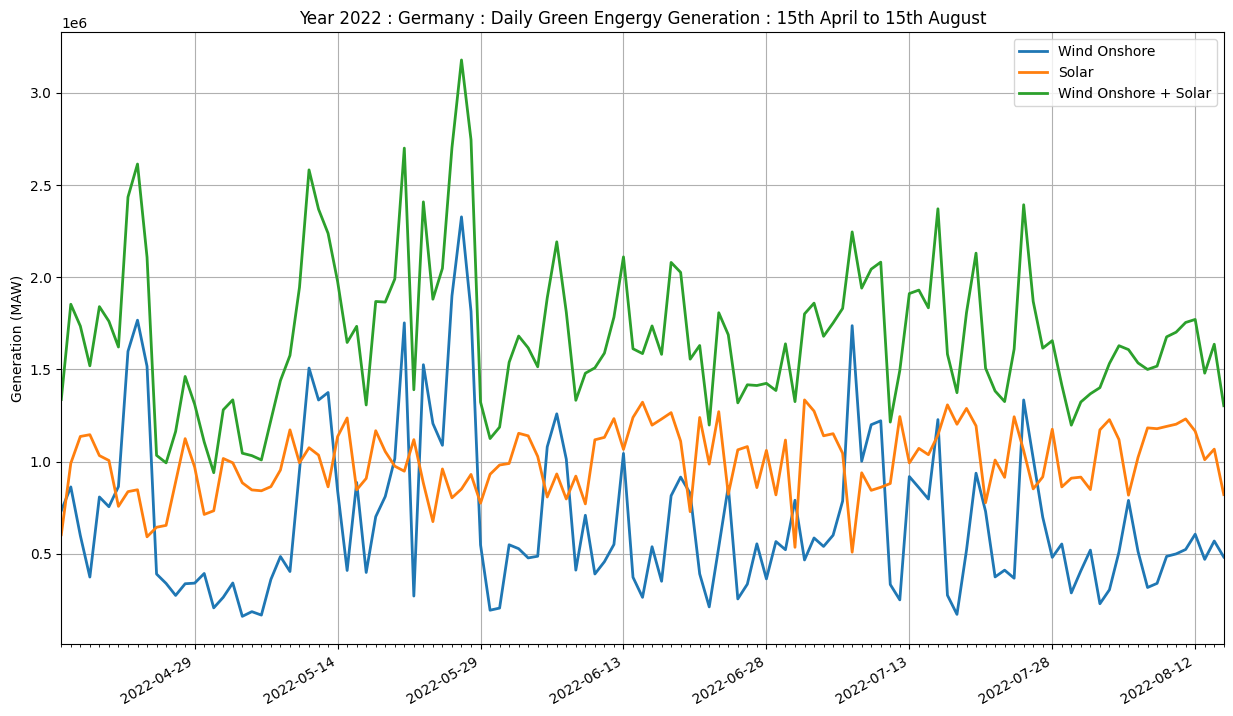

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(pd.to_datetime(df_gen_2022_daily_de_wind_onshore["StartTime"]).dt.date, df_gen_2022_daily_de_wind_onshore["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_daily_de_solar["StartTime"]).dt.date, df_gen_2022_daily_de_solar["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_daily_de_wind_onshore_solar["StartTime"]).dt.date, df_gen_2022_daily_de_wind_onshore_solar["quantity"], lw=2, label='Wind Onshore + Solar')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Daily Green Engergy Generation : 15th April to 15th August')
ax.set_xlim(pd.to_datetime(df_gen_2022_daily_de_wind_onshore_solar.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_daily_de_wind_onshore_solar.loc[df_gen_2022_daily_de_wind_onshore_solar.shape[0] - 1, "StartTime"]))

major_daily_locator = mdates.DayLocator(interval=15)
minor_daily_locator = mdates.DayLocator(interval=1)
ax.xaxis.set_major_locator(major_daily_locator)
ax.xaxis.set_minor_locator(minor_daily_locator)

fig.autofmt_xdate()

In [60]:
file_name = "/kaggle/input/europe-green-electricity-generation-consumption/2022-2023-hourly/de/gen_DE_B19.csv"

In [61]:
df_gen_2022_hourly_de_wind_onshore = pd.read_csv(file_name)
df_gen_2022_hourly_de_wind_onshore

,StartTime,EndTime,quantity
0,2021-12-31 23:00:00+00:00,2022-01-01 00:00:00+00:00,24850
1,2022-01-01 00:00:00+00:00,2022-01-01 01:00:00+00:00,95800
2,2022-01-01 01:00:00+00:00,2022-01-01 02:00:00+00:00,91464
3,2022-01-01 02:00:00+00:00,2022-01-01 03:00:00+00:00,86282
4,2022-01-01 03:00:00+00:00,2022-01-01 04:00:00+00:00,80912
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [62]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-04-22 00:00:00+00:00')
df_gen_2022_hourly_de_wind_onshore_apr_may = df_gen_2022_hourly_de_wind_onshore[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore["StartTime"]) >= start_date]
df_gen_2022_hourly_de_wind_onshore_apr_may

,StartTime,EndTime,quantity
2665,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,50948
2666,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,51643
2667,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,53593
2668,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,54993
2669,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,52414
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [63]:
end_date = datetime.fromisoformat('2022-05-08 23:59:59+00:00')
df_gen_2022_hourly_de_wind_onshore_apr_may = df_gen_2022_hourly_de_wind_onshore_apr_may[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_apr_may["StartTime"]) <= end_date]
df_gen_2022_hourly_de_wind_onshore_apr_may

,StartTime,EndTime,quantity
2665,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,50948
2666,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,51643
2667,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,53593
2668,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,54993
2669,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,52414
...,...,...,...
11829,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,0
11830,2022-05-08 20:00:00+00:00,2022-05-08 21:00:00+00:00,0
11831,2022-05-08 21:00:00+00:00,2022-05-08 22:00:00+00:00,0
11832,2022-05-08 22:00:00+00:00,2022-05-08 23:00:00+00:00,0


In [64]:
df_gen_2022_hourly_de_wind_onshore_apr_may = df_gen_2022_hourly_de_wind_onshore_apr_may.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_apr_may = df_gen_2022_hourly_de_wind_onshore_apr_may.reset_index()
df_gen_2022_hourly_de_wind_onshore_apr_may

,StartTime,EndTime,quantity
0,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,50948
1,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,51643
2,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,53593
3,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,54993
4,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,52414
...,...,...,...
403,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,26427
404,2022-05-08 20:00:00+00:00,2022-05-08 21:00:00+00:00,29486
405,2022-05-08 21:00:00+00:00,2022-05-08 22:00:00+00:00,29924
406,2022-05-08 22:00:00+00:00,2022-05-08 23:00:00+00:00,29582


In [65]:
file_name = "/kaggle/input/europe-green-electricity-generation-consumption/2022-2023-hourly/de/gen_DE_B16.csv"

In [66]:
df_gen_2022_hourly_de_solar = pd.read_csv(file_name)
df_gen_2022_hourly_de_solar

,StartTime,EndTime,quantity
0,2021-12-31 23:00:00+00:00,2022-01-01 00:00:00+00:00,0
1,2022-01-01 00:00:00+00:00,2022-01-01 01:00:00+00:00,0
2,2022-01-01 01:00:00+00:00,2022-01-01 02:00:00+00:00,0
3,2022-01-01 02:00:00+00:00,2022-01-01 03:00:00+00:00,0
4,2022-01-01 03:00:00+00:00,2022-01-01 04:00:00+00:00,0
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


2nd Apr 2022 to 2nd Aug 2022

In [67]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-04-22 00:00:00+00:00')
df_gen_2022_hourly_de_solar_apr_may = df_gen_2022_hourly_de_solar[pd.to_datetime(df_gen_2022_hourly_de_solar["StartTime"]) >= start_date]
df_gen_2022_hourly_de_solar_apr_may

,StartTime,EndTime,quantity
2665,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,0
2666,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,0
2667,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,0
2668,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,43
2669,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,3507
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [68]:
end_date = datetime.fromisoformat('2022-05-08 23:59:59+00:00')
df_gen_2022_hourly_de_solar_apr_may = df_gen_2022_hourly_de_solar_apr_may[pd.to_datetime(df_gen_2022_hourly_de_solar_apr_may["StartTime"]) <= end_date]
df_gen_2022_hourly_de_solar_apr_may

,StartTime,EndTime,quantity
2665,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,0
2666,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,0
2667,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,0
2668,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,43
2669,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,3507
...,...,...,...
11829,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,0
11830,2022-05-08 20:00:00+00:00,2022-05-08 21:00:00+00:00,0
11831,2022-05-08 21:00:00+00:00,2022-05-08 22:00:00+00:00,0
11832,2022-05-08 22:00:00+00:00,2022-05-08 23:00:00+00:00,0


In [69]:
df_gen_2022_hourly_de_solar_apr_may = df_gen_2022_hourly_de_solar_apr_may.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_solar_apr_may = df_gen_2022_hourly_de_solar_apr_may.reset_index()
df_gen_2022_hourly_de_solar_apr_may

,StartTime,EndTime,quantity
0,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,0
1,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,0
2,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,0
3,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,43
4,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,3507
...,...,...,...
403,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,1
404,2022-05-08 20:00:00+00:00,2022-05-08 21:00:00+00:00,0
405,2022-05-08 21:00:00+00:00,2022-05-08 22:00:00+00:00,0
406,2022-05-08 22:00:00+00:00,2022-05-08 23:00:00+00:00,0


In [70]:
#df_gen_2022_hourly_de_wind_onshore_apr_may.to_csv("/kaggle/working/df_gen_2022_hourly_de_wind_onshore.csv", index=False)
#df_gen_2022_hourly_de_solar_apr_may.to_csv("/kaggle/working/df_gen_2022_hourly_de_solar.csv", index=False)

In [71]:
df_gen_2022_hourly_de_wos_solar_apr_may = pd.concat([df_gen_2022_hourly_de_wind_onshore_apr_may, df_gen_2022_hourly_de_solar_apr_may])
df_gen_2022_hourly_de_wos_solar_apr_may

,StartTime,EndTime,quantity
0,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,50948
1,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,51643
2,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,53593
3,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,54993
4,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,52414
...,...,...,...
403,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,1
404,2022-05-08 20:00:00+00:00,2022-05-08 21:00:00+00:00,0
405,2022-05-08 21:00:00+00:00,2022-05-08 22:00:00+00:00,0
406,2022-05-08 22:00:00+00:00,2022-05-08 23:00:00+00:00,0


In [72]:
#df_gen_2022_hourly_de_wos_solar_apr_may.to_csv("/kaggle/working/df_gen_2022_hourly_de_wos_solar.csv", index=False)

In [73]:
df_gen_2022_hourly_de_wind_onshore_solar_apr_may = df_gen_2022_hourly_de_wos_solar_apr_may.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_solar_apr_may = df_gen_2022_hourly_de_wind_onshore_solar_apr_may.reset_index()
df_gen_2022_hourly_de_wind_onshore_solar_apr_may

,StartTime,EndTime,quantity
0,2022-04-22 00:00:00+00:00,2022-04-22 01:00:00+00:00,50948
1,2022-04-22 01:00:00+00:00,2022-04-22 02:00:00+00:00,51643
2,2022-04-22 02:00:00+00:00,2022-04-22 03:00:00+00:00,53593
3,2022-04-22 03:00:00+00:00,2022-04-22 04:00:00+00:00,55036
4,2022-04-22 04:00:00+00:00,2022-04-22 05:00:00+00:00,55921
...,...,...,...
403,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,26428
404,2022-05-08 20:00:00+00:00,2022-05-08 21:00:00+00:00,29486
405,2022-05-08 21:00:00+00:00,2022-05-08 22:00:00+00:00,29924
406,2022-05-08 22:00:00+00:00,2022-05-08 23:00:00+00:00,29582


In [74]:
#df_gen_2022_hourly_de_wind_onshore_solar_apr_may.to_csv("/kaggle/working/df_gen_2022_hourly_de_wind_onshore_solar.csv", index=False)

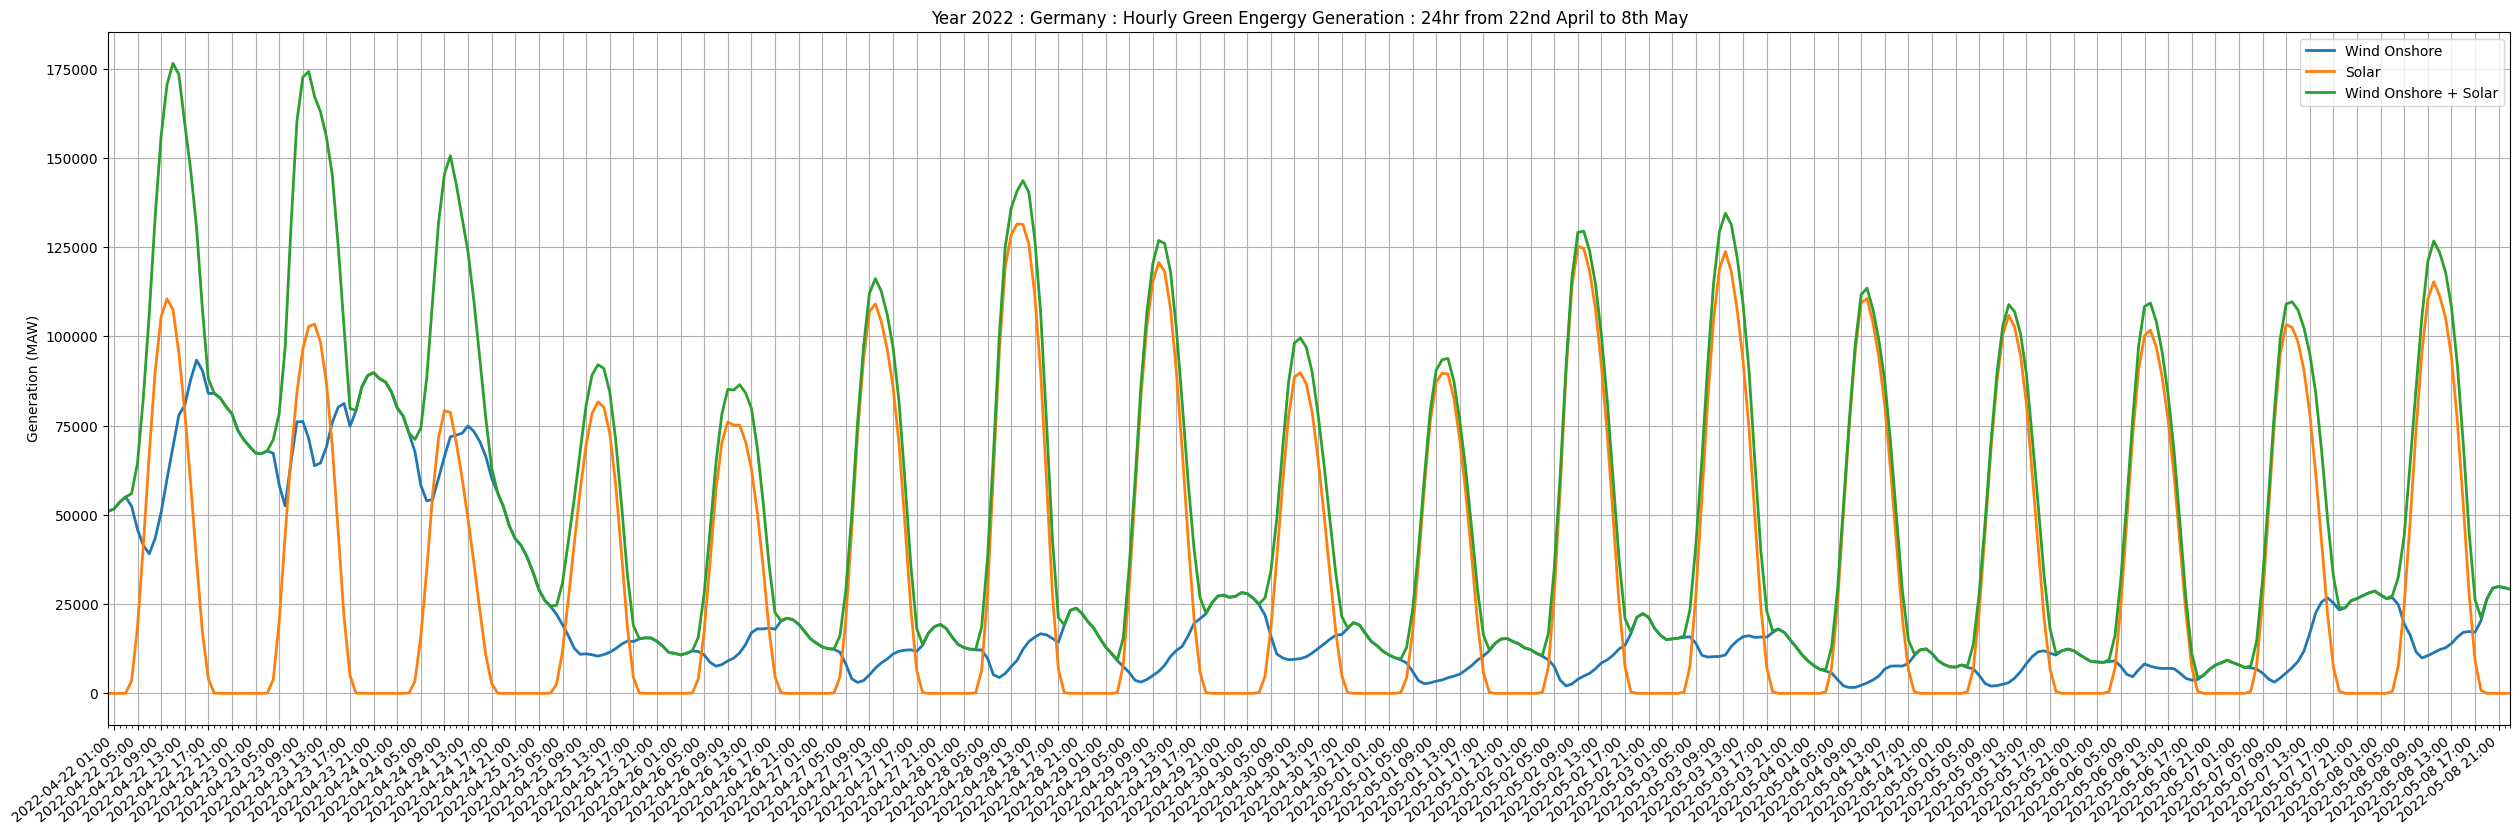

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(31,9))

ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_apr_may["StartTime"]), df_gen_2022_hourly_de_wind_onshore_apr_may["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_solar_apr_may["StartTime"]), df_gen_2022_hourly_de_solar_apr_may["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_apr_may["StartTime"]), df_gen_2022_hourly_de_wind_onshore_solar_apr_may["quantity"], lw=2, label='Wind Onshore + Solar')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Hourly Green Engergy Generation : 24hr from 22nd April to 8th May')

ax.set_xlim(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_apr_may.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_apr_may.loc[df_gen_2022_hourly_de_wind_onshore_solar_apr_may.shape[0] - 1, "StartTime"]))
    
major_hourly_locator = mdates.HourLocator(interval=4)
minor_hourly_locator = mdates.HourLocator(interval=1)
ax.xaxis.set_major_locator(major_hourly_locator)
ax.xaxis.set_minor_locator(minor_hourly_locator)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)

# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
#fig.autofmt_xdate()

In [76]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-06-20 00:00:00+00:00')
df_gen_2022_hourly_de_wind_onshore_jun_jul = df_gen_2022_hourly_de_wind_onshore[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore["StartTime"]) >= start_date]
df_gen_2022_hourly_de_wind_onshore_jun_jul

,StartTime,EndTime,quantity
4081,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,14526
4082,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,15813
4083,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,15717
4084,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,19173
4085,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,17470
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [77]:
end_date = datetime.fromisoformat('2022-07-02 23:59:59+00:00')
df_gen_2022_hourly_de_wind_onshore_jun_jul = df_gen_2022_hourly_de_wind_onshore_jun_jul[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_jun_jul["StartTime"]) <= end_date]
df_gen_2022_hourly_de_wind_onshore_jun_jul

,StartTime,EndTime,quantity
4081,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,14526
4082,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,15813
4083,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,15717
4084,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,19173
4085,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,17470
...,...,...,...
13149,2022-07-02 19:00:00+00:00,2022-07-02 20:00:00+00:00,0
13150,2022-07-02 20:00:00+00:00,2022-07-02 21:00:00+00:00,0
13151,2022-07-02 21:00:00+00:00,2022-07-02 22:00:00+00:00,0
13152,2022-07-02 22:00:00+00:00,2022-07-02 23:00:00+00:00,0


In [78]:
df_gen_2022_hourly_de_wind_onshore_jun_jul = df_gen_2022_hourly_de_wind_onshore_jun_jul.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_jun_jul = df_gen_2022_hourly_de_wind_onshore_jun_jul.reset_index()
df_gen_2022_hourly_de_wind_onshore_jun_jul

,StartTime,EndTime,quantity
0,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,14526
1,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,15813
2,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,15717
3,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,19173
4,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,17470
...,...,...,...
307,2022-07-02 19:00:00+00:00,2022-07-02 20:00:00+00:00,18215
308,2022-07-02 20:00:00+00:00,2022-07-02 21:00:00+00:00,27936
309,2022-07-02 21:00:00+00:00,2022-07-02 22:00:00+00:00,36134
310,2022-07-02 22:00:00+00:00,2022-07-02 23:00:00+00:00,40225


In [79]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-06-20 00:00:00+00:00')
df_gen_2022_hourly_de_solar_jun_jul = df_gen_2022_hourly_de_solar[pd.to_datetime(df_gen_2022_hourly_de_solar["StartTime"]) >= start_date]
df_gen_2022_hourly_de_solar_jun_jul

,StartTime,EndTime,quantity
4081,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,0
4082,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,0
4083,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,72
4084,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,2258
4085,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,10168
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [80]:
end_date = datetime.fromisoformat('2022-07-02 23:59:59+00:00')
df_gen_2022_hourly_de_solar_jun_jul = df_gen_2022_hourly_de_solar_jun_jul[pd.to_datetime(df_gen_2022_hourly_de_solar_jun_jul["StartTime"]) <= end_date]
df_gen_2022_hourly_de_solar_jun_jul

,StartTime,EndTime,quantity
4081,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,0
4082,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,0
4083,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,72
4084,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,2258
4085,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,10168
...,...,...,...
13149,2022-07-02 19:00:00+00:00,2022-07-02 20:00:00+00:00,0
13150,2022-07-02 20:00:00+00:00,2022-07-02 21:00:00+00:00,0
13151,2022-07-02 21:00:00+00:00,2022-07-02 22:00:00+00:00,0
13152,2022-07-02 22:00:00+00:00,2022-07-02 23:00:00+00:00,0


In [81]:
df_gen_2022_hourly_de_solar_jun_jul = df_gen_2022_hourly_de_solar_jun_jul.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_solar_jun_jul = df_gen_2022_hourly_de_solar_jun_jul.reset_index()
df_gen_2022_hourly_de_solar_jun_jul

,StartTime,EndTime,quantity
0,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,0
1,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,0
2,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,72
3,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,2258
4,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,10168
...,...,...,...
307,2022-07-02 19:00:00+00:00,2022-07-02 20:00:00+00:00,158
308,2022-07-02 20:00:00+00:00,2022-07-02 21:00:00+00:00,0
309,2022-07-02 21:00:00+00:00,2022-07-02 22:00:00+00:00,0
310,2022-07-02 22:00:00+00:00,2022-07-02 23:00:00+00:00,0


In [82]:
df_gen_2022_hourly_de_wos_solar_jun_jul = pd.concat([df_gen_2022_hourly_de_wind_onshore_jun_jul, df_gen_2022_hourly_de_solar_jun_jul])
df_gen_2022_hourly_de_wos_solar_jun_jul

,StartTime,EndTime,quantity
0,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,14526
1,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,15813
2,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,15717
3,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,19173
4,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,17470
...,...,...,...
307,2022-07-02 19:00:00+00:00,2022-07-02 20:00:00+00:00,158
308,2022-07-02 20:00:00+00:00,2022-07-02 21:00:00+00:00,0
309,2022-07-02 21:00:00+00:00,2022-07-02 22:00:00+00:00,0
310,2022-07-02 22:00:00+00:00,2022-07-02 23:00:00+00:00,0


In [83]:
df_gen_2022_hourly_de_wind_onshore_solar_jun_jul = df_gen_2022_hourly_de_wos_solar_jun_jul.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_solar_jun_jul = df_gen_2022_hourly_de_wind_onshore_solar_jun_jul.reset_index()
df_gen_2022_hourly_de_wind_onshore_solar_jun_jul

,StartTime,EndTime,quantity
0,2022-06-20 00:00:00+00:00,2022-06-20 01:00:00+00:00,14526
1,2022-06-20 01:00:00+00:00,2022-06-20 02:00:00+00:00,15813
2,2022-06-20 02:00:00+00:00,2022-06-20 03:00:00+00:00,15789
3,2022-06-20 03:00:00+00:00,2022-06-20 04:00:00+00:00,21431
4,2022-06-20 04:00:00+00:00,2022-06-20 05:00:00+00:00,27638
...,...,...,...
307,2022-07-02 19:00:00+00:00,2022-07-02 20:00:00+00:00,18373
308,2022-07-02 20:00:00+00:00,2022-07-02 21:00:00+00:00,27936
309,2022-07-02 21:00:00+00:00,2022-07-02 22:00:00+00:00,36134
310,2022-07-02 22:00:00+00:00,2022-07-02 23:00:00+00:00,40225


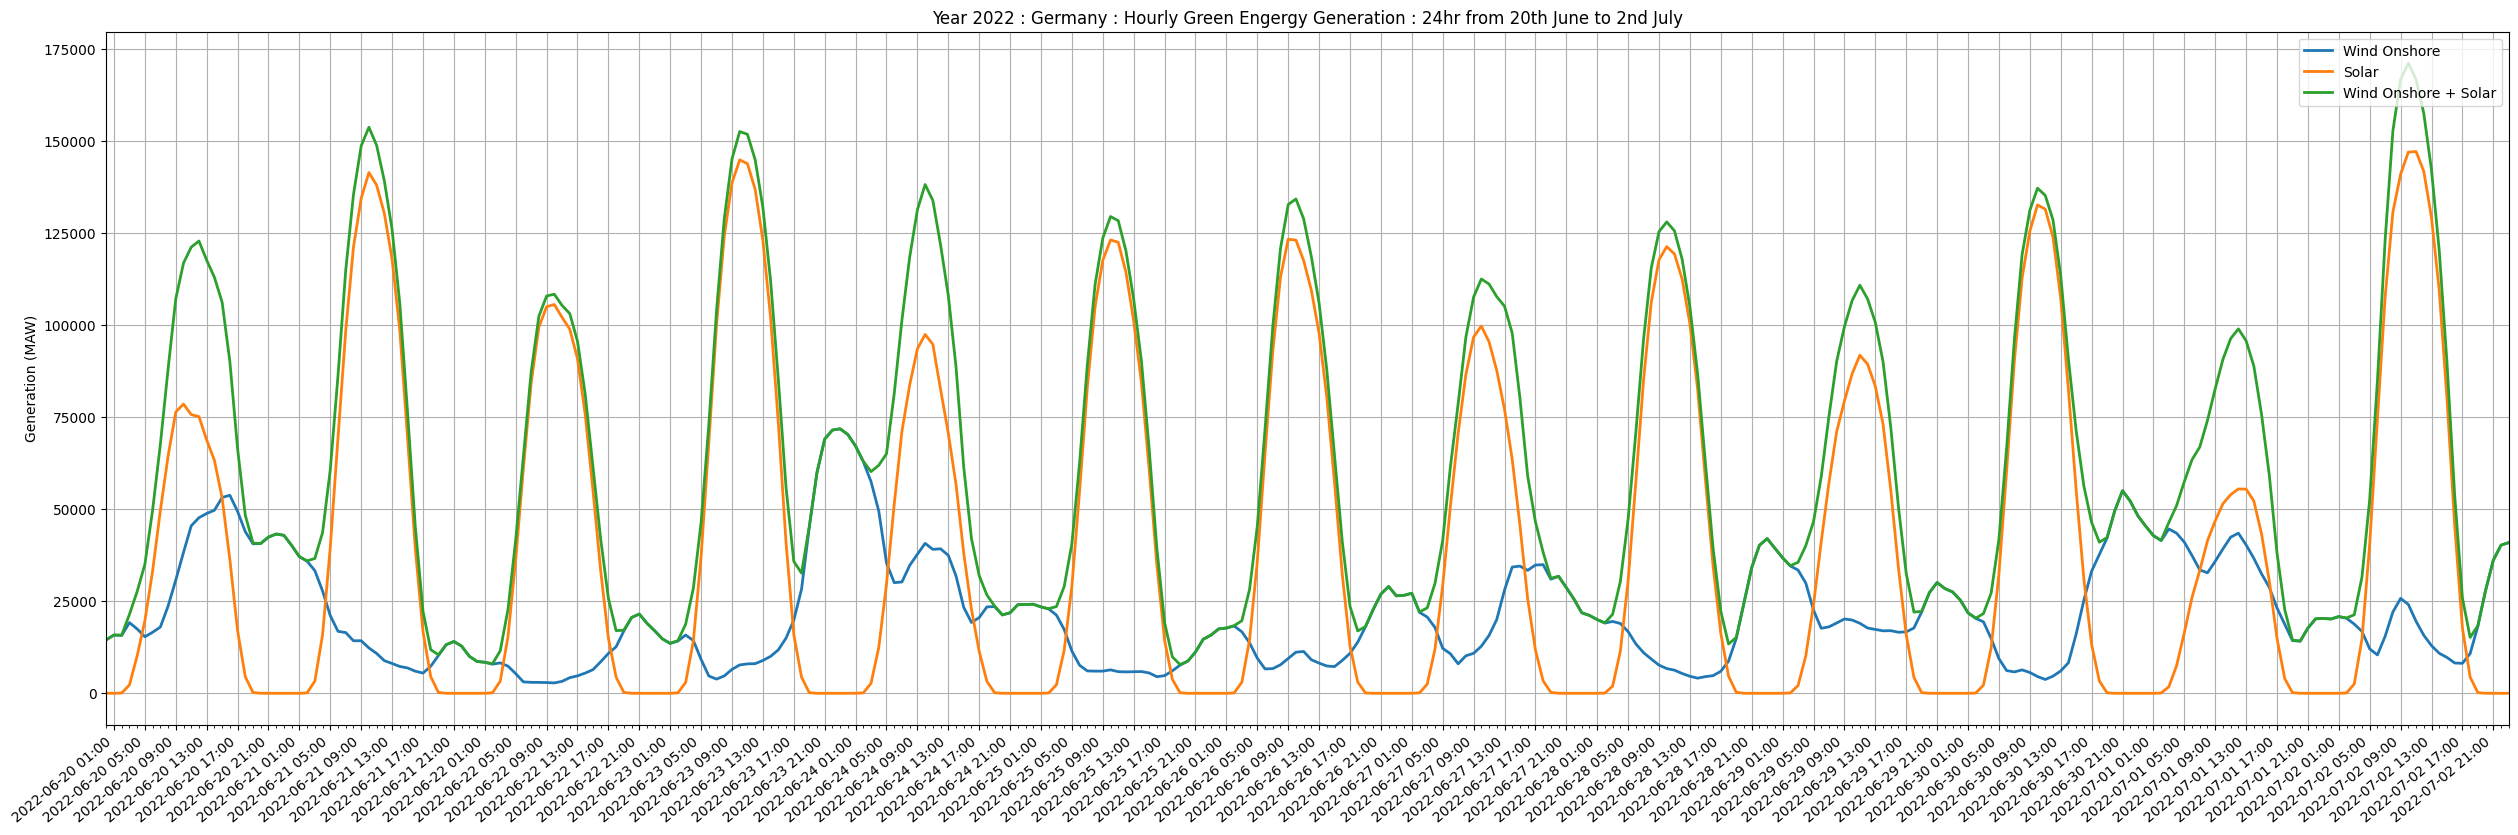

In [84]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(31,9))

ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_jun_jul["StartTime"]), df_gen_2022_hourly_de_wind_onshore_jun_jul["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_solar_jun_jul["StartTime"]), df_gen_2022_hourly_de_solar_jun_jul["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_jun_jul["StartTime"]), df_gen_2022_hourly_de_wind_onshore_solar_jun_jul["quantity"], lw=2, label='Wind Onshore + Solar')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Hourly Green Engergy Generation : 24hr from 20th June to 2nd July')

ax.set_xlim(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_jun_jul.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_jun_jul.loc[df_gen_2022_hourly_de_wind_onshore_solar_jun_jul.shape[0] - 1, "StartTime"]))
    
major_hourly_locator = mdates.HourLocator(interval=4)
minor_hourly_locator = mdates.HourLocator(interval=1)
ax.xaxis.set_major_locator(major_hourly_locator)
ax.xaxis.set_minor_locator(minor_hourly_locator)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)

# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
#fig.autofmt_xdate()

In [85]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-07-15 00:00:00+00:00')
df_gen_2022_hourly_de_wind_onshore_jul_aug = df_gen_2022_hourly_de_wind_onshore[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore["StartTime"]) >= start_date]
df_gen_2022_hourly_de_wind_onshore_jul_aug

,StartTime,EndTime,quantity
4681,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,41977
4682,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,40881
4683,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,39944
4684,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,38512
4685,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,34971
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [86]:
end_date = datetime.fromisoformat('2022-08-01 23:59:59+00:00')
df_gen_2022_hourly_de_wind_onshore_jul_aug = df_gen_2022_hourly_de_wind_onshore_jul_aug[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_jul_aug["StartTime"]) <= end_date]
df_gen_2022_hourly_de_wind_onshore_jul_aug

,StartTime,EndTime,quantity
4681,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,41977
4682,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,40881
4683,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,39944
4684,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,38512
4685,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,34971
...,...,...,...
13869,2022-08-01 19:00:00+00:00,2022-08-01 20:00:00+00:00,0
13870,2022-08-01 20:00:00+00:00,2022-08-01 21:00:00+00:00,0
13871,2022-08-01 21:00:00+00:00,2022-08-01 22:00:00+00:00,0
13872,2022-08-01 22:00:00+00:00,2022-08-01 23:00:00+00:00,0


In [87]:
df_gen_2022_hourly_de_wind_onshore_jul_aug = df_gen_2022_hourly_de_wind_onshore_jul_aug.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_jul_aug = df_gen_2022_hourly_de_wind_onshore_jul_aug.reset_index()
df_gen_2022_hourly_de_wind_onshore_jul_aug

,StartTime,EndTime,quantity
0,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,41977
1,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,40881
2,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,39944
3,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,38512
4,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,34971
...,...,...,...
427,2022-08-01 19:00:00+00:00,2022-08-01 20:00:00+00:00,11154
428,2022-08-01 20:00:00+00:00,2022-08-01 21:00:00+00:00,11717
429,2022-08-01 21:00:00+00:00,2022-08-01 22:00:00+00:00,10677
430,2022-08-01 22:00:00+00:00,2022-08-01 23:00:00+00:00,8857


In [88]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-07-15 00:00:00+00:00')
df_gen_2022_hourly_de_solar_jul_aug = df_gen_2022_hourly_de_solar[pd.to_datetime(df_gen_2022_hourly_de_solar["StartTime"]) >= start_date]
df_gen_2022_hourly_de_solar_jul_aug

,StartTime,EndTime,quantity
4681,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,0
4682,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,0
4683,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,14
4684,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,1655
4685,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,11805
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [89]:
end_date = datetime.fromisoformat('2022-08-01 23:59:59+00:00')
df_gen_2022_hourly_de_solar_jul_aug = df_gen_2022_hourly_de_solar_jul_aug[pd.to_datetime(df_gen_2022_hourly_de_solar_jul_aug["StartTime"]) <= end_date]
df_gen_2022_hourly_de_solar_jul_aug

,StartTime,EndTime,quantity
4681,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,0
4682,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,0
4683,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,14
4684,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,1655
4685,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,11805
...,...,...,...
13869,2022-08-01 19:00:00+00:00,2022-08-01 20:00:00+00:00,0
13870,2022-08-01 20:00:00+00:00,2022-08-01 21:00:00+00:00,0
13871,2022-08-01 21:00:00+00:00,2022-08-01 22:00:00+00:00,0
13872,2022-08-01 22:00:00+00:00,2022-08-01 23:00:00+00:00,0


In [90]:
df_gen_2022_hourly_de_solar_jul_aug = df_gen_2022_hourly_de_solar_jul_aug.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_solar_jul_aug = df_gen_2022_hourly_de_solar_jul_aug.reset_index()
df_gen_2022_hourly_de_solar_jul_aug

,StartTime,EndTime,quantity
0,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,0
1,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,0
2,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,14
3,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,1655
4,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,11805
...,...,...,...
427,2022-08-01 19:00:00+00:00,2022-08-01 20:00:00+00:00,2
428,2022-08-01 20:00:00+00:00,2022-08-01 21:00:00+00:00,0
429,2022-08-01 21:00:00+00:00,2022-08-01 22:00:00+00:00,0
430,2022-08-01 22:00:00+00:00,2022-08-01 23:00:00+00:00,0


In [91]:
df_gen_2022_hourly_de_wos_solar_jul_aug = pd.concat([df_gen_2022_hourly_de_wind_onshore_jul_aug, df_gen_2022_hourly_de_solar_jul_aug])
df_gen_2022_hourly_de_wos_solar_jul_aug

,StartTime,EndTime,quantity
0,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,41977
1,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,40881
2,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,39944
3,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,38512
4,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,34971
...,...,...,...
427,2022-08-01 19:00:00+00:00,2022-08-01 20:00:00+00:00,2
428,2022-08-01 20:00:00+00:00,2022-08-01 21:00:00+00:00,0
429,2022-08-01 21:00:00+00:00,2022-08-01 22:00:00+00:00,0
430,2022-08-01 22:00:00+00:00,2022-08-01 23:00:00+00:00,0


In [92]:
df_gen_2022_hourly_de_wind_onshore_solar_jul_aug = df_gen_2022_hourly_de_wos_solar_jul_aug.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_solar_jul_aug = df_gen_2022_hourly_de_wind_onshore_solar_jul_aug.reset_index()
df_gen_2022_hourly_de_wind_onshore_solar_jul_aug

,StartTime,EndTime,quantity
0,2022-07-15 00:00:00+00:00,2022-07-15 01:00:00+00:00,41977
1,2022-07-15 01:00:00+00:00,2022-07-15 02:00:00+00:00,40881
2,2022-07-15 02:00:00+00:00,2022-07-15 03:00:00+00:00,39958
3,2022-07-15 03:00:00+00:00,2022-07-15 04:00:00+00:00,40167
4,2022-07-15 04:00:00+00:00,2022-07-15 05:00:00+00:00,46776
...,...,...,...
427,2022-08-01 19:00:00+00:00,2022-08-01 20:00:00+00:00,11156
428,2022-08-01 20:00:00+00:00,2022-08-01 21:00:00+00:00,11717
429,2022-08-01 21:00:00+00:00,2022-08-01 22:00:00+00:00,10677
430,2022-08-01 22:00:00+00:00,2022-08-01 23:00:00+00:00,8857


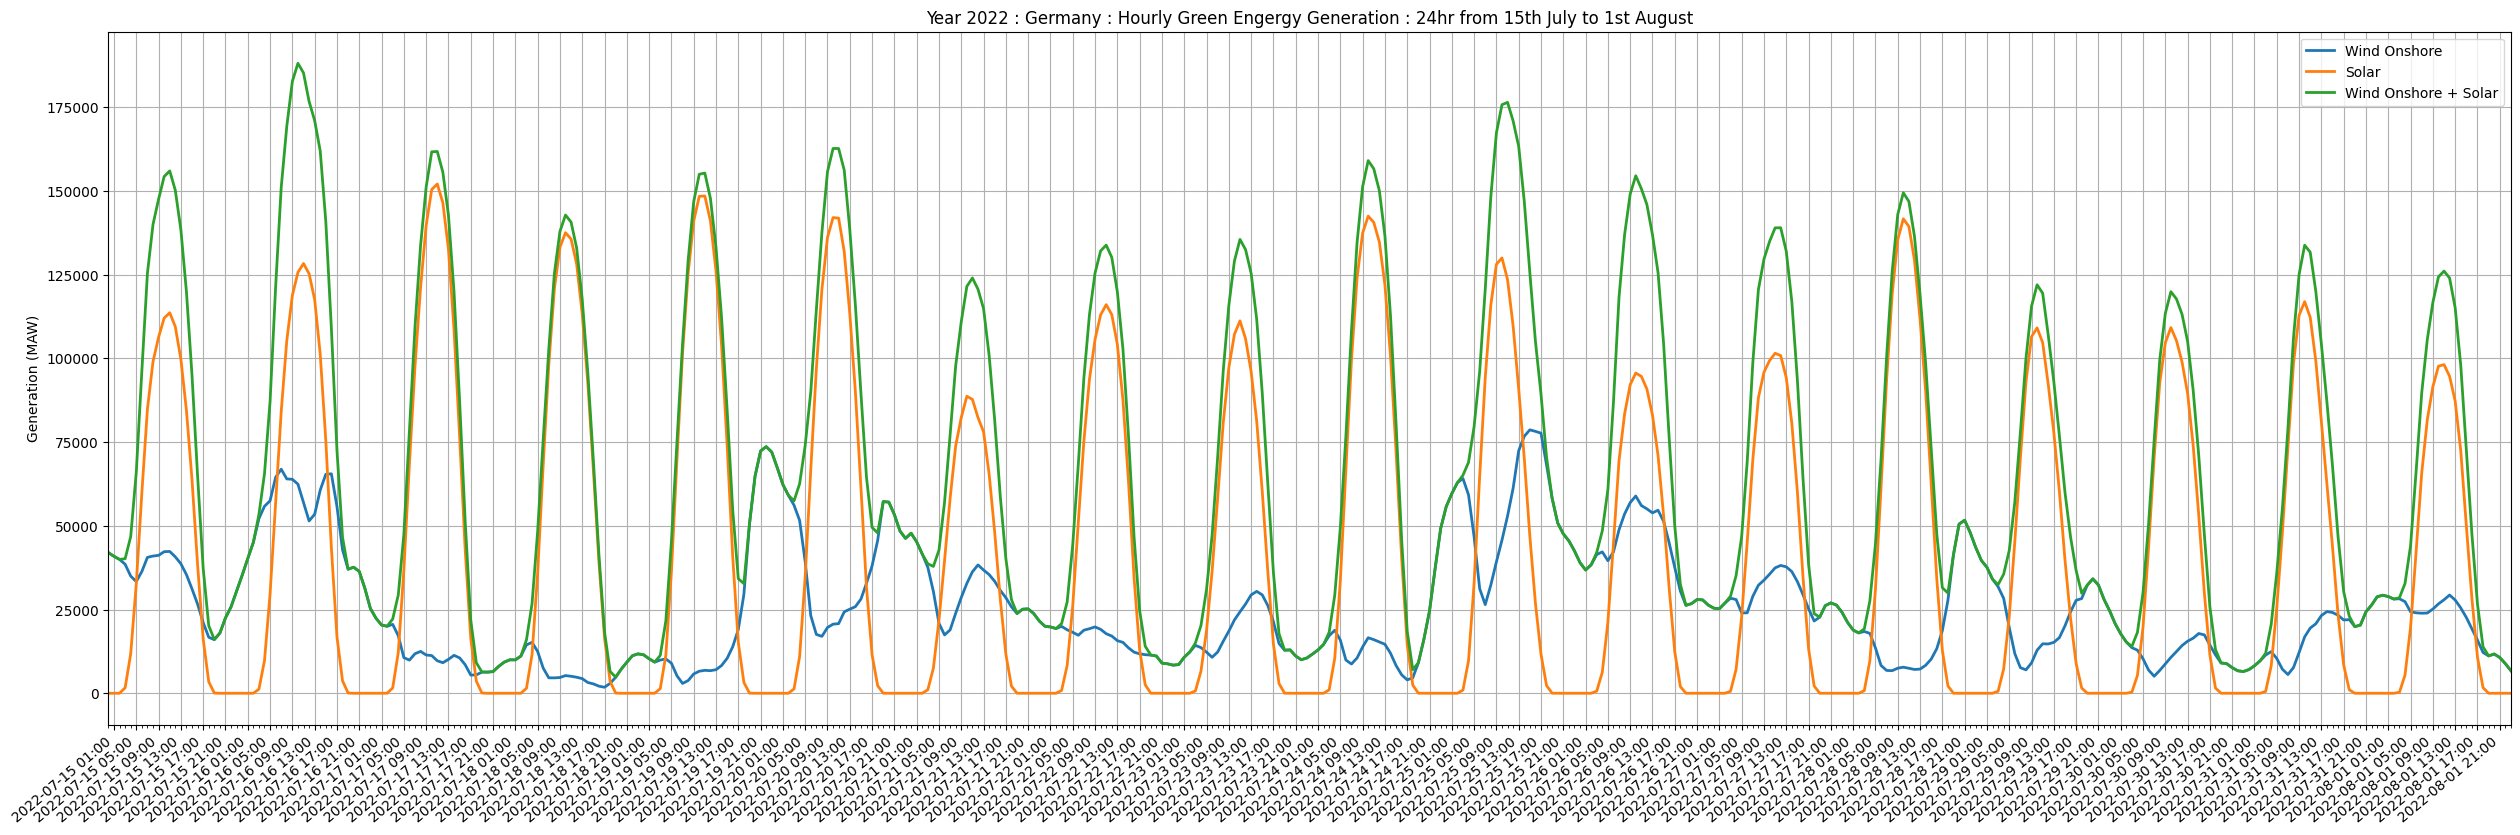

In [93]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(31,9))

ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_jul_aug["StartTime"]), df_gen_2022_hourly_de_wind_onshore_jul_aug["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_solar_jul_aug["StartTime"]), df_gen_2022_hourly_de_solar_jul_aug["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_jul_aug["StartTime"]), df_gen_2022_hourly_de_wind_onshore_solar_jul_aug["quantity"], lw=2, label='Wind Onshore + Solar')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Hourly Green Engergy Generation : 24hr from 15th July to 1st August')

ax.set_xlim(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_jul_aug.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_jul_aug.loc[df_gen_2022_hourly_de_wind_onshore_solar_jul_aug.shape[0] - 1, "StartTime"]))
    
major_hourly_locator = mdates.HourLocator(interval=4)
minor_hourly_locator = mdates.HourLocator(interval=1)
ax.xaxis.set_major_locator(major_hourly_locator)
ax.xaxis.set_minor_locator(minor_hourly_locator)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)

# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
#fig.autofmt_xdate()

2nd Apr 2022 to 2nd Aug 2022

1st Feb 2022 to 28th Feb 2022

In [94]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-02-01 00:00:00+00:00')
df_gen_2022_hourly_de_wind_onshore_feb = df_gen_2022_hourly_de_wind_onshore[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore["StartTime"]) >= start_date]
df_gen_2022_hourly_de_wind_onshore_feb

,StartTime,EndTime,quantity
745,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,72717
746,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,73825
747,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,74708
748,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,78192
749,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,86374
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [95]:
end_date = datetime.fromisoformat('2022-02-28 23:59:59+00:00')
df_gen_2022_hourly_de_wind_onshore_feb = df_gen_2022_hourly_de_wind_onshore_feb[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_feb["StartTime"]) <= end_date]
df_gen_2022_hourly_de_wind_onshore_feb

,StartTime,EndTime,quantity
745,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,72717
746,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,73825
747,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,74708
748,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,78192
749,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,86374
...,...,...,...
10173,2022-02-28 19:00:00+00:00,2022-02-28 20:00:00+00:00,0
10174,2022-02-28 20:00:00+00:00,2022-02-28 21:00:00+00:00,0
10175,2022-02-28 21:00:00+00:00,2022-02-28 22:00:00+00:00,0
10176,2022-02-28 22:00:00+00:00,2022-02-28 23:00:00+00:00,0


In [96]:
df_gen_2022_hourly_de_wind_onshore_feb = df_gen_2022_hourly_de_wind_onshore_feb.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_feb = df_gen_2022_hourly_de_wind_onshore_feb.reset_index()
df_gen_2022_hourly_de_wind_onshore_feb

,StartTime,EndTime,quantity
0,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,72717
1,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,73825
2,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,74708
3,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,78192
4,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,86374
...,...,...,...
667,2022-02-28 19:00:00+00:00,2022-02-28 20:00:00+00:00,81650
668,2022-02-28 20:00:00+00:00,2022-02-28 21:00:00+00:00,85293
669,2022-02-28 21:00:00+00:00,2022-02-28 22:00:00+00:00,83168
670,2022-02-28 22:00:00+00:00,2022-02-28 23:00:00+00:00,78630


In [97]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-02-01 00:00:00+00:00')
df_gen_2022_hourly_de_solar_feb = df_gen_2022_hourly_de_solar[pd.to_datetime(df_gen_2022_hourly_de_solar["StartTime"]) >= start_date]
df_gen_2022_hourly_de_solar_feb

,StartTime,EndTime,quantity
745,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,0
746,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,0
747,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,0
748,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,0
749,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,0
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [98]:
end_date = datetime.fromisoformat('2022-02-28 23:59:59+00:00')
df_gen_2022_hourly_de_solar_feb = df_gen_2022_hourly_de_solar_feb[pd.to_datetime(df_gen_2022_hourly_de_solar_feb["StartTime"]) <= end_date]
df_gen_2022_hourly_de_solar_feb

,StartTime,EndTime,quantity
745,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,0
746,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,0
747,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,0
748,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,0
749,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,0
...,...,...,...
10173,2022-02-28 19:00:00+00:00,2022-02-28 20:00:00+00:00,0
10174,2022-02-28 20:00:00+00:00,2022-02-28 21:00:00+00:00,0
10175,2022-02-28 21:00:00+00:00,2022-02-28 22:00:00+00:00,0
10176,2022-02-28 22:00:00+00:00,2022-02-28 23:00:00+00:00,0


In [99]:
df_gen_2022_hourly_de_solar_feb = df_gen_2022_hourly_de_solar_feb.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_solar_feb = df_gen_2022_hourly_de_solar_feb.reset_index()
df_gen_2022_hourly_de_solar_feb

,StartTime,EndTime,quantity
0,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,0
1,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,0
2,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,0
3,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,0
4,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,0
...,...,...,...
667,2022-02-28 19:00:00+00:00,2022-02-28 20:00:00+00:00,0
668,2022-02-28 20:00:00+00:00,2022-02-28 21:00:00+00:00,0
669,2022-02-28 21:00:00+00:00,2022-02-28 22:00:00+00:00,0
670,2022-02-28 22:00:00+00:00,2022-02-28 23:00:00+00:00,0


In [100]:
df_gen_2022_hourly_de_wos_solar_feb = pd.concat([df_gen_2022_hourly_de_wind_onshore_feb, df_gen_2022_hourly_de_solar_feb])
df_gen_2022_hourly_de_wos_solar_feb

,StartTime,EndTime,quantity
0,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,72717
1,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,73825
2,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,74708
3,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,78192
4,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,86374
...,...,...,...
667,2022-02-28 19:00:00+00:00,2022-02-28 20:00:00+00:00,0
668,2022-02-28 20:00:00+00:00,2022-02-28 21:00:00+00:00,0
669,2022-02-28 21:00:00+00:00,2022-02-28 22:00:00+00:00,0
670,2022-02-28 22:00:00+00:00,2022-02-28 23:00:00+00:00,0


In [101]:
df_gen_2022_hourly_de_wind_onshore_solar_feb = df_gen_2022_hourly_de_wos_solar_feb.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_solar_feb = df_gen_2022_hourly_de_wind_onshore_solar_feb.reset_index()
df_gen_2022_hourly_de_wind_onshore_solar_feb

,StartTime,EndTime,quantity
0,2022-02-01 00:00:00+00:00,2022-02-01 01:00:00+00:00,72717
1,2022-02-01 01:00:00+00:00,2022-02-01 02:00:00+00:00,73825
2,2022-02-01 02:00:00+00:00,2022-02-01 03:00:00+00:00,74708
3,2022-02-01 03:00:00+00:00,2022-02-01 04:00:00+00:00,78192
4,2022-02-01 04:00:00+00:00,2022-02-01 05:00:00+00:00,86374
...,...,...,...
667,2022-02-28 19:00:00+00:00,2022-02-28 20:00:00+00:00,81650
668,2022-02-28 20:00:00+00:00,2022-02-28 21:00:00+00:00,85293
669,2022-02-28 21:00:00+00:00,2022-02-28 22:00:00+00:00,83168
670,2022-02-28 22:00:00+00:00,2022-02-28 23:00:00+00:00,78630


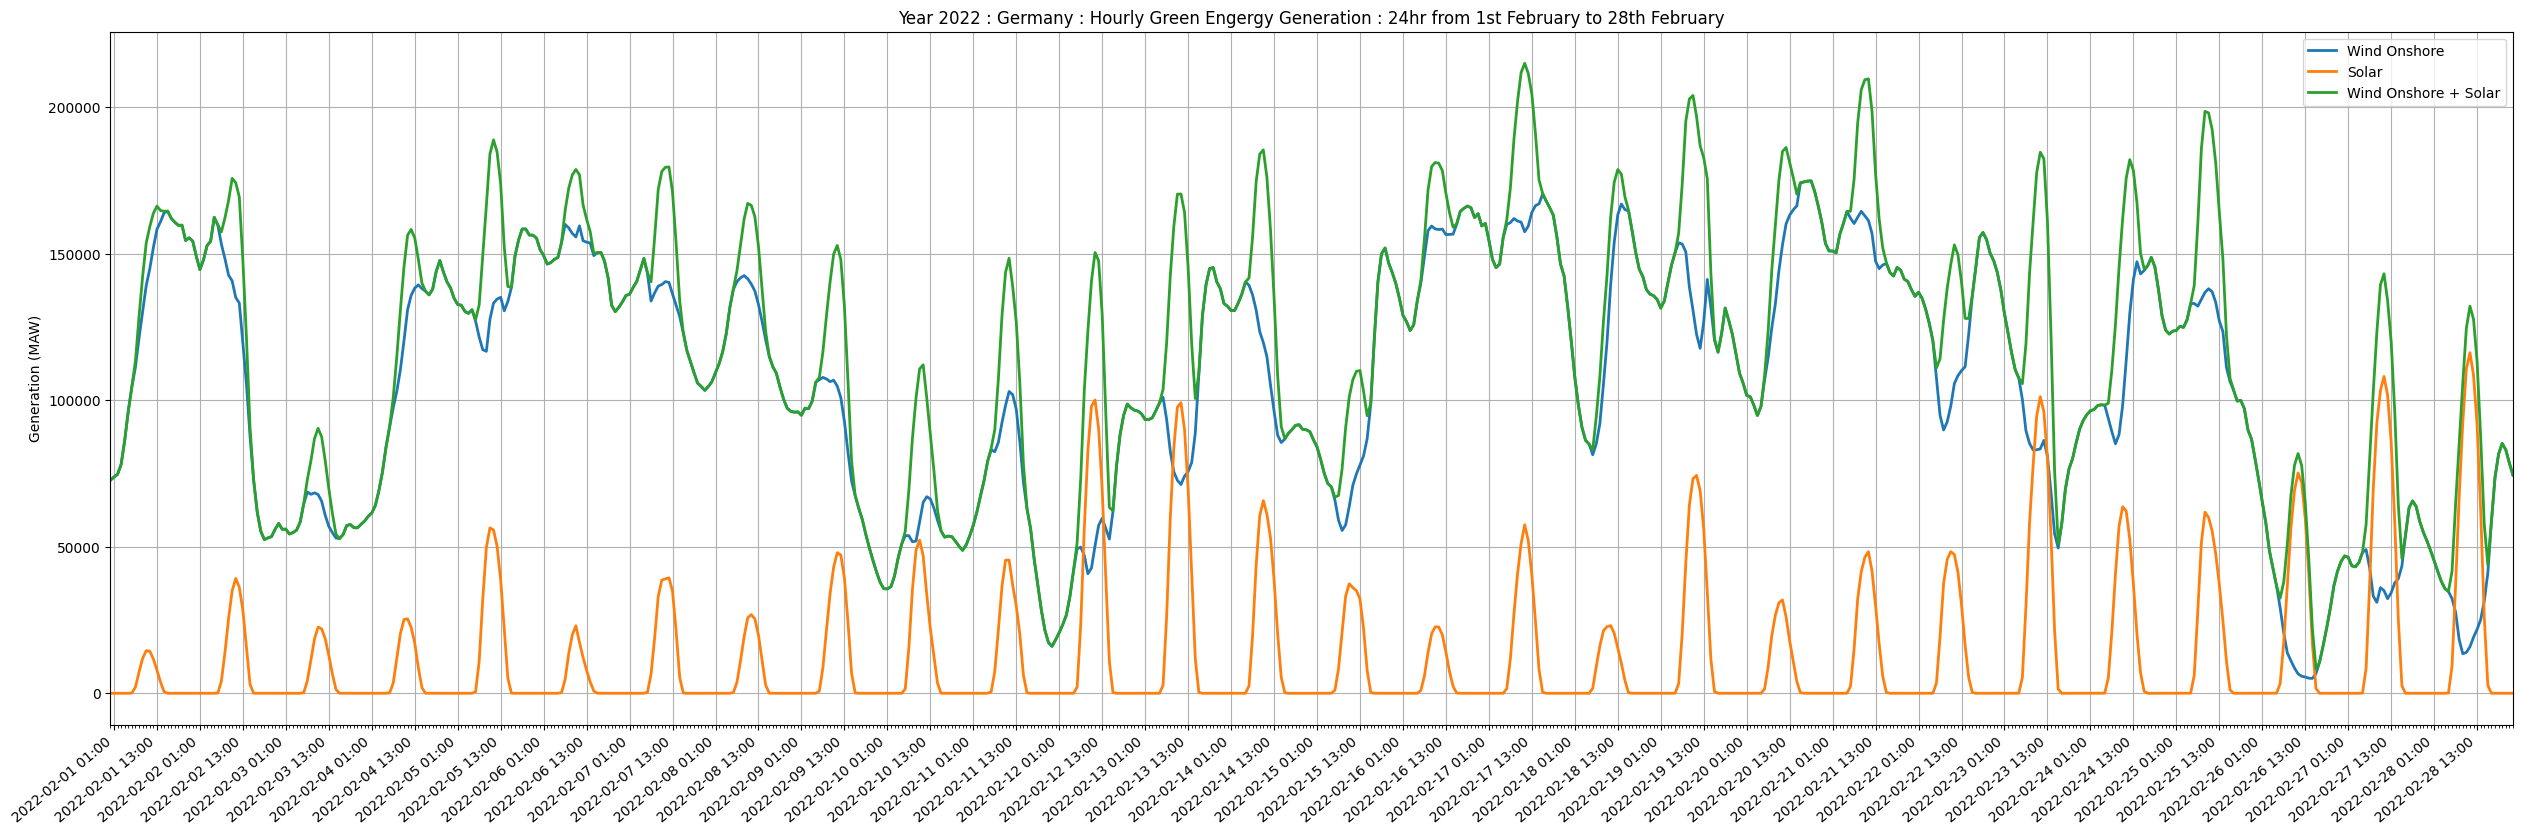

In [102]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(31,9))

ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_feb["StartTime"]), df_gen_2022_hourly_de_wind_onshore_feb["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_solar_feb["StartTime"]), df_gen_2022_hourly_de_solar_feb["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_feb["StartTime"]), df_gen_2022_hourly_de_wind_onshore_solar_feb["quantity"], lw=2, label='Wind Onshore + Solar')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Hourly Green Engergy Generation : 24hr from 1st February to 28th February')

ax.set_xlim(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_feb.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_feb.loc[df_gen_2022_hourly_de_wind_onshore_solar_feb.shape[0] - 1, "StartTime"]))
    
major_hourly_locator = mdates.HourLocator(interval=12)
minor_hourly_locator = mdates.HourLocator(interval=1)
ax.xaxis.set_major_locator(major_hourly_locator)
ax.xaxis.set_minor_locator(minor_hourly_locator)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)

# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
#fig.autofmt_xdate()

1st Feb 2022 to 28th Feb 2022

1st Oct 2022 to 31st Dec 2022

In [103]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-10-01 00:00:00+00:00')
df_gen_2022_hourly_de_wind_onshore_oct_dec = df_gen_2022_hourly_de_wind_onshore[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore["StartTime"]) >= start_date]
df_gen_2022_hourly_de_wind_onshore_oct_dec

,StartTime,EndTime,quantity
6553,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,93678
6554,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,97577
6555,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,99599
6556,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,107435
6557,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,115690
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [104]:
end_date = datetime.fromisoformat('2022-12-31 23:59:59+00:00')
df_gen_2022_hourly_de_wind_onshore_oct_dec = df_gen_2022_hourly_de_wind_onshore_oct_dec[pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_oct_dec["StartTime"]) <= end_date]
df_gen_2022_hourly_de_wind_onshore_oct_dec

,StartTime,EndTime,quantity
6553,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,93678
6554,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,97577
6555,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,99599
6556,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,107435
6557,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,115690
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [105]:
df_gen_2022_hourly_de_wind_onshore_oct_dec = df_gen_2022_hourly_de_wind_onshore_oct_dec.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_oct_dec = df_gen_2022_hourly_de_wind_onshore_oct_dec.reset_index()
df_gen_2022_hourly_de_wind_onshore_oct_dec

,StartTime,EndTime,quantity
0,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,93678
1,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,97577
2,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,99599
3,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,107435
4,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,115690
...,...,...,...
2203,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,123138
2204,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,121959
2205,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,121516
2206,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,116246


In [106]:
from datetime import datetime
start_date = datetime.fromisoformat('2022-10-01 00:00:00+00:00')
df_gen_2022_hourly_de_solar_oct_dec = df_gen_2022_hourly_de_solar[pd.to_datetime(df_gen_2022_hourly_de_solar["StartTime"]) >= start_date]
df_gen_2022_hourly_de_solar_oct_dec

,StartTime,EndTime,quantity
6553,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,0
6554,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,0
6555,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,0
6556,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,0
6557,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,15
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [107]:
end_date = datetime.fromisoformat('2022-12-31 23:59:59+00:00')
df_gen_2022_hourly_de_solar_oct_dec = df_gen_2022_hourly_de_solar_oct_dec[pd.to_datetime(df_gen_2022_hourly_de_solar_oct_dec["StartTime"]) <= end_date]
df_gen_2022_hourly_de_solar_oct_dec

,StartTime,EndTime,quantity
6553,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,0
6554,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,0
6555,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,0
6556,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,0
6557,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,15
...,...,...,...
17517,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
17518,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
17519,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
17520,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [108]:
df_gen_2022_hourly_de_solar_oct_dec = df_gen_2022_hourly_de_solar_oct_dec.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_solar_oct_dec = df_gen_2022_hourly_de_solar_oct_dec.reset_index()
df_gen_2022_hourly_de_solar_oct_dec

,StartTime,EndTime,quantity
0,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,0
1,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,0
2,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,0
3,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,0
4,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,15
...,...,...,...
2203,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
2204,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
2205,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
2206,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [109]:
df_gen_2022_hourly_de_wos_solar_oct_dec = pd.concat([df_gen_2022_hourly_de_wind_onshore_oct_dec, df_gen_2022_hourly_de_solar_oct_dec])
df_gen_2022_hourly_de_wos_solar_oct_dec

,StartTime,EndTime,quantity
0,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,93678
1,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,97577
2,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,99599
3,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,107435
4,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,115690
...,...,...,...
2203,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,0
2204,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,0
2205,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,0
2206,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,0


In [110]:
df_gen_2022_hourly_de_wind_onshore_solar_oct_dec = df_gen_2022_hourly_de_wos_solar_oct_dec.groupby(by=["StartTime", "EndTime"])["quantity"].sum()
df_gen_2022_hourly_de_wind_onshore_solar_oct_dec = df_gen_2022_hourly_de_wind_onshore_solar_oct_dec.reset_index()
df_gen_2022_hourly_de_wind_onshore_solar_oct_dec

,StartTime,EndTime,quantity
0,2022-10-01 00:00:00+00:00,2022-10-01 01:00:00+00:00,93678
1,2022-10-01 01:00:00+00:00,2022-10-01 02:00:00+00:00,97577
2,2022-10-01 02:00:00+00:00,2022-10-01 03:00:00+00:00,99599
3,2022-10-01 03:00:00+00:00,2022-10-01 04:00:00+00:00,107435
4,2022-10-01 04:00:00+00:00,2022-10-01 05:00:00+00:00,115705
...,...,...,...
2203,2022-12-31 19:00:00+00:00,2022-12-31 20:00:00+00:00,123138
2204,2022-12-31 20:00:00+00:00,2022-12-31 21:00:00+00:00,121959
2205,2022-12-31 21:00:00+00:00,2022-12-31 22:00:00+00:00,121516
2206,2022-12-31 22:00:00+00:00,2022-12-31 23:00:00+00:00,116246


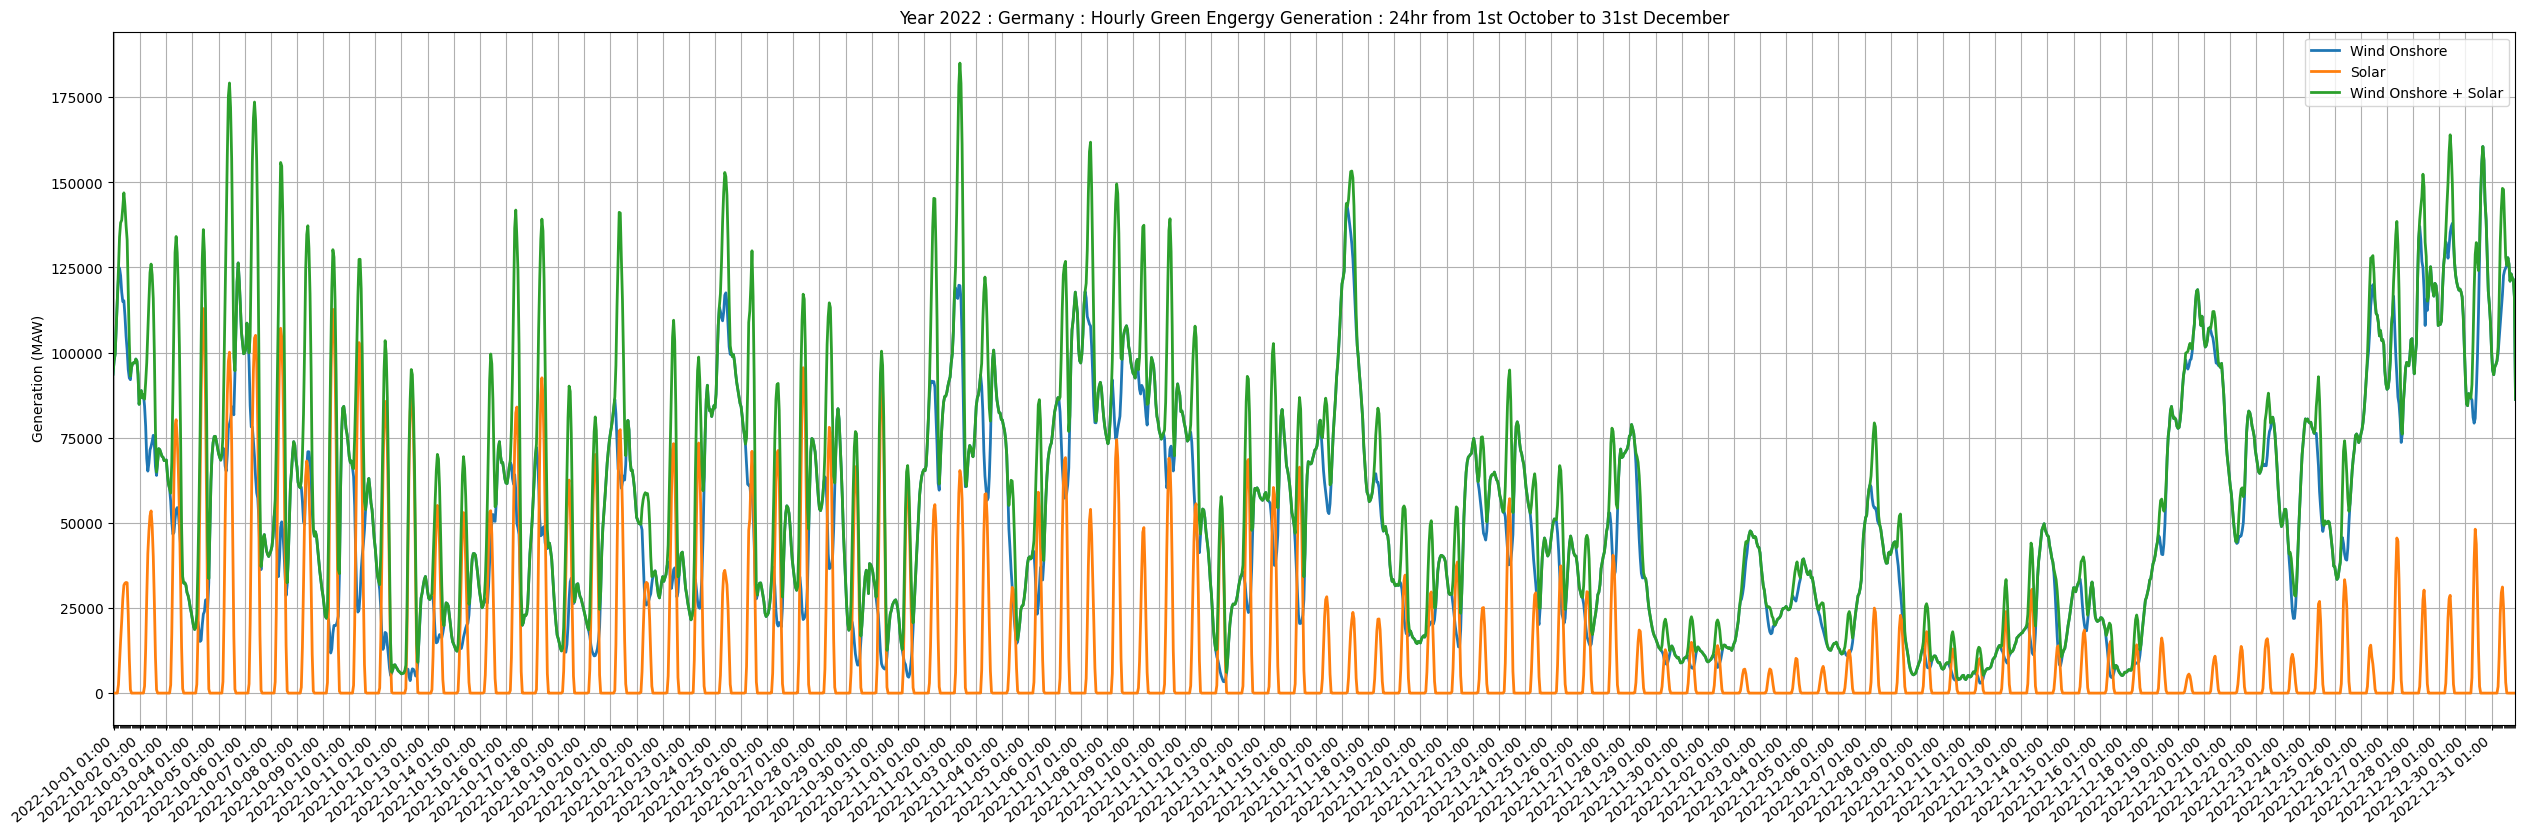

In [111]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(31,9))

ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_oct_dec["StartTime"]), df_gen_2022_hourly_de_wind_onshore_oct_dec["quantity"], lw=2, label='Wind Onshore')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_solar_oct_dec["StartTime"]), df_gen_2022_hourly_de_solar_oct_dec["quantity"], lw=2, label='Solar')
ax.plot(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_oct_dec["StartTime"]), df_gen_2022_hourly_de_wind_onshore_solar_oct_dec["quantity"], lw=2, label='Wind Onshore + Solar')

ax.legend(loc='upper right')
ax.grid(True)
ax.label_outer()
ax.set_ylabel('Generation (MAW)')
ax.set_title('Year 2022 : Germany : Hourly Green Engergy Generation : 24hr from 1st October to 31st December')

ax.set_xlim(pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_oct_dec.loc[0, "StartTime"]), pd.to_datetime(df_gen_2022_hourly_de_wind_onshore_solar_oct_dec.loc[df_gen_2022_hourly_de_wind_onshore_solar_oct_dec.shape[0] - 1, "StartTime"]))
    
major_hourly_locator = mdates.HourLocator(interval=24)
minor_hourly_locator = mdates.HourLocator(interval=1)
ax.xaxis.set_major_locator(major_hourly_locator)
ax.xaxis.set_minor_locator(minor_hourly_locator)

xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)

# rotate_labels...
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')
#fig.autofmt_xdate()